In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Load

In [ ]:
from pandas.core.ops import make_flex_doc
#Ton
calendar= "/content/drive/MyDrive/AIrBNB/calendar.csv"
listing = "/content/drive/MyDrive/AIrBNB/listingszip.csv"
neighbour = "/content/drive/MyDrive/AIrBNB/neighbourhoods.csv"
neighbourjson = "/content/drive/MyDrive/AIrBNB/neighbourhoods.geojson"
review = "/content/drive/MyDrive/AIrBNB/reviewszip.csv"
#listing = "/content/drive/MyDrive/AIrBNB/listingsziptest.csv"
markets = "/content/drive/MyDrive/AIrBNB/MARKTEN_AMBULANT(1).csv"
metro = "/content/drive/MyDrive/AIrBNB/TRAMMETRO_PUNTEN_2022.csv"


cd=pd.read_csv(calendar)
ls=pd.read_csv(listing)
nb=pd.read_csv(neighbour)
rv=pd.read_csv(review)
mk=pd.read_csv(markets)
mt=pd.read_csv(metro)

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
gdf = gpd.read_file(neighbourjson)

##Explore Data

In [ ]:
ls.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818.0,https://www.airbnb.com/rooms/2818,2.022090e+13,9/7/2022,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.86
1,20168.0,https://www.airbnb.com/rooms/20168,2.022090e+13,9/7/2022,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.22
2,27886.0,https://www.airbnb.com/rooms/27886,2.022090e+13,9/7/2022,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.78
3,28871.0,https://www.airbnb.com/rooms/28871,2.022090e+13,9/7/2022,city scrape,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.96,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.92
4,29051.0,https://www.airbnb.com/rooms/29051,2.022090e+13,9/7/2022,city scrape,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.77,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.16


In [ ]:
ls.describe(include="object")

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,6893,6893,6893,6893,6877,4628,6893,6893,6893,6893,...,6893,6878,6893,6893,6893,6893,6247,6247,6449,6893
unique,6893,2,2,6819,6777,4183,6809,5769,2823,2657,...,4,23,6693,590,2,2,2283,853,5412,2
top,https://www.airbnb.com/rooms/2818,9/7/2022,city scrape,Residences | 2-Bedrooms | Serviced Apartment,"Museums, thrift shopping, and stroopwafels — y...",Traditionally a blue collar neighbourhood just...,https://a0.muscache.com/pictures/d6ffe619-9708...,https://www.airbnb.com/users/show/14574533,Peter,4/22/2014,...,Entire home/apt,1 bath,"[""Wifi"", ""Shampoo"", ""TV"", ""Heating"", ""Long ter...",$150.00,t,9/7/2022,5/29/2022,9/4/2022,Exempt,f
freq,1,6892,4332,11,7,19,7,21,51,25,...,4922,2795,9,253,6874,6892,27,261,605,4761


In [ ]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6893 non-null   float64
 1   listing_url                                   6893 non-null   object 
 2   scrape_id                                     6893 non-null   float64
 3   last_scraped                                  6893 non-null   object 
 4   source                                        6893 non-null   object 
 5   name                                          6893 non-null   object 
 6   description                                   6877 non-null   object 
 7   neighborhood_overview                         4628 non-null   object 
 8   picture_url                                   6893 non-null   object 
 9   host_id                                       6893 non-null   i

##Drop feature

In [ ]:
#NoValue
ls.drop(columns="bathrooms" , inplace=True)
ls.drop(columns="neighbourhood_group_cleansed" , inplace=True)
ls.drop(columns="calendar_updated" , inplace=True)

In [ ]:
#unqiue
ls.drop(columns="listing_url" , inplace=True)
ls.drop(columns="picture_url" , inplace=True)
ls.drop(columns="host_url" , inplace=True)
ls.drop(columns="host_thumbnail_url" , inplace=True)
ls.drop(columns="host_picture_url" , inplace=True)
#NoRev
ls.drop(columns="minimum_minimum_nights" , inplace=True)
ls.drop(columns="maximum_minimum_nights" , inplace=True)
ls.drop(columns="minimum_maximum_nights" , inplace=True)
ls.drop(columns="maximum_maximum_nights" , inplace=True)

In [ ]:
ls.drop(columns="description" , inplace=True)
ls.drop(columns="name" , inplace=True)
ls.drop(columns="neighborhood_overview" , inplace=True)
ls.drop(columns="host_about" , inplace=True)
ls.drop(columns="scrape_id" , inplace=True)
ls.drop(columns="host_name" , inplace=True)
ls.drop(columns="calendar_last_scraped" , inplace=True)
ls.drop(columns="first_review" , inplace=True)
ls.drop(columns="minimum_nights_avg_ntm" , inplace=True)
ls.drop(columns="maximum_nights_avg_ntm" , inplace=True)
ls.drop(columns="host_verifications" , inplace=True)


In [ ]:
ls.drop(columns="host_neighbourhood" , inplace=True)
ls.drop(columns="neighbourhood" , inplace=True)

##last_review and host_since == datetimes type

ทำการจัดการข้อมูลที่เป็น datetime คือ last_review กับ host_since และหาเป็นระยะห่างว่ามากน้อยเพียงใด

In [ ]:
ls.last_scraped = pd.to_datetime(ls.last_scraped)
ls.last_review = pd.to_datetime(ls.last_review)

######last_review Covert to day_of_lastreview

In [ ]:
ls['day_of_lastreview'] = ls['last_scraped'] - ls['last_review']

In [ ]:
ls['day_of_lastreview']

0         8 days
1       881 days
2       136 days
3        14 days
4         9 days
          ...   
6888     18 days
6889     43 days
6890     31 days
6891   1129 days
6892     17 days
Name: day_of_lastreview, Length: 6893, dtype: timedelta64[ns]

In [ ]:
ls.day_of_lastreview = ls.day_of_lastreview.astype('string')

In [ ]:
ls['day_of_lastreview'] = ls['day_of_lastreview'].str.extract(r'([\d]*[.][\d]+|[\d]+)')

In [ ]:
ls['day_of_lastreview']

0          8
1        881
2        136
3         14
4          9
        ... 
6888      18
6889      43
6890      31
6891    1129
6892      17
Name: day_of_lastreview, Length: 6893, dtype: object

In [ ]:
ls['day_of_lastreview'].fillna(ls['day_of_lastreview'].value_counts().idxmax(), inplace=True)

In [ ]:
ls.day_of_lastreview = ls.day_of_lastreview.astype('int')

In [ ]:
ls.last_scraped

0      2022-09-07
1      2022-09-07
2      2022-09-07
3      2022-09-07
4      2022-09-07
          ...    
6888   2022-09-07
6889   2022-09-07
6890   2022-09-07
6891   2022-09-07
6892   2022-09-07
Name: last_scraped, Length: 6893, dtype: datetime64[ns]

In [ ]:
ls.last_review

0      2022-08-30
1      2020-04-09
2      2022-04-24
3      2022-08-24
4      2022-08-29
          ...    
6888   2022-08-20
6889   2022-07-26
6890   2022-08-07
6891   2019-08-05
6892   2022-08-21
Name: last_review, Length: 6893, dtype: datetime64[ns]

In [ ]:
ls['day_of_lastreview'].value_counts()

3       907
2       208
17      183
10      162
16      117
       ... 
365       1
1002      1
1579      1
1256      1
781       1
Name: day_of_lastreview, Length: 853, dtype: int64

In [ ]:
# create a list of our conditions
conditions = [
    (ls['day_of_lastreview'] >= 0) & (ls['day_of_lastreview'] <= 90),
    (ls['day_of_lastreview'] >= 91) & (ls['day_of_lastreview'] <= 180),
    (ls['day_of_lastreview'] >= 181) & (ls['day_of_lastreview'] <= 270),
    (ls['day_of_lastreview'] >= 271) & (ls['day_of_lastreview'] <= 365),
    (ls['day_of_lastreview'] >= 366)]

values = [1, 2, 3, 4, 5]

ls['bin_of_lastreview'] = np.select(conditions, values)


In [ ]:
ls['bin_of_lastreview']

0       1
1       5
2       2
3       1
4       1
       ..
6888    1
6889    1
6890    1
6891    5
6892    1
Name: bin_of_lastreview, Length: 6893, dtype: int64

1    4905
5    1175
2     516
4     189
3     108
Name: bin_of_lastreview, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'lastreview')

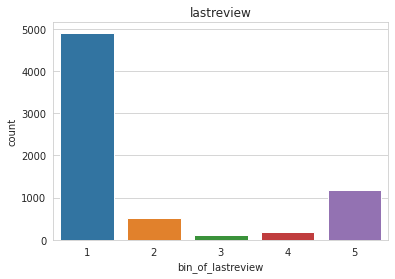

In [ ]:
print(ls['bin_of_lastreview'].value_counts())
sns.set_style("whitegrid")
sns.countplot(ls['bin_of_lastreview'],data =ls)
plt.title("lastreview")


In [ ]:
ls.drop(columns="day_of_lastreview" , inplace=True)

######Host_since

In [ ]:
ls['host_since']

0        9/24/2008
1        12/2/2009
2        3/23/2010
3        5/13/2010
4        5/13/2010
           ...    
6888      5/3/2014
6889    10/13/2015
6890     9/22/2016
6891     1/18/2016
6892     3/16/2015
Name: host_since, Length: 6893, dtype: object

In [ ]:
#ตัด host_since เป็นปี
ls.host_since = pd.to_datetime(ls.host_since)
ls['host_since'] = ls['last_scraped'].dt.year - ls['host_since'].dt.year

In [ ]:
ls['host_since']

0       14
1       13
2       12
3       12
4       12
        ..
6888     8
6889     7
6890     6
6891     6
6892     7
Name: host_since, Length: 6893, dtype: int64

8     1142
9     1041
7     1012
6      886
10     645
5      424
3      408
4      395
2      276
1      247
11     189
0      179
12      43
13       4
14       2
Name: host_since, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'host_since')

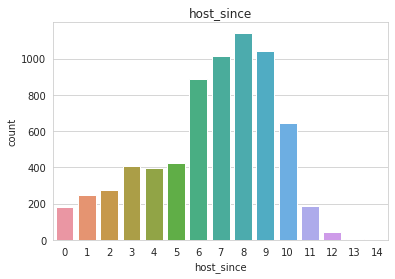

In [ ]:
print(ls['host_since'].value_counts())
sns.set_style("whitegrid")
sns.countplot(ls['host_since'],data =ls)
plt.title("host_since")

In [ ]:
ls.drop(columns="last_scraped" , inplace=True)
ls.drop(columns="last_review" , inplace=True)

##Host_location

ทำการจัดการ Host_location เพื่อดูว่า Host นั้นอาศัยอยู่ใน amsterdam ไหม

In [ ]:
ls.host_location

0          Amsterdam, Netherlands
1          Amsterdam, Netherlands
2          Amsterdam, Netherlands
3          Amsterdam, Netherlands
4          Amsterdam, Netherlands
                  ...            
6888       Amsterdam, Netherlands
6889                          NaN
6890    Duivendrecht, Netherlands
6891      Amstelveen, Netherlands
6892       Amsterdam, Netherlands
Name: host_location, Length: 6893, dtype: object

In [ ]:
#แปลง host_location ที่อยู้ใน Amsterdam ให้เป็น 1 ไม่อยู่เป็น 0
ls['isAmsterdam'] = ls['host_location'].str.extract(r'(Amsterdam)')
ls['isAmsterdam'] = ls['isAmsterdam'].str.replace(r'Amsterdam', '1', regex=True)
ls['isAmsterdam'] = ls['isAmsterdam'].fillna(0)
ls['isAmsterdam']

0       1
1       1
2       1
3       1
4       1
       ..
6888    1
6889    0
6890    0
6891    0
6892    1
Name: isAmsterdam, Length: 6893, dtype: object

In [ ]:
ls["isAmsterdam"].value_counts()

1    5376
0    1517
Name: isAmsterdam, dtype: int64

1    5376
0    1517
Name: isAmsterdam, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'isAmsterdame')

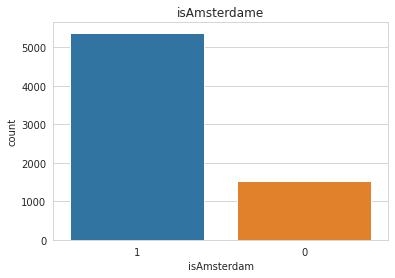

In [ ]:
print(ls['isAmsterdam'].value_counts())
sns.set_style("whitegrid")
sns.countplot(ls['isAmsterdam'],data =ls)
plt.title("isAmsterdame")

In [ ]:
ls.drop(columns="host_location" , inplace=True)

##Bathrooms_text

จัดการข้อมูล Bathrooms_text โดยแจกออกมาเป็น bathrooms ที่เป็นตัวเลข และ Bathroom type

In [ ]:
ls['bathrooms_text']

0       1.5 shared baths
1         1 private bath
2              1.5 baths
3          1 shared bath
4          1 shared bath
              ...       
6888           2.5 baths
6889             3 baths
6890             2 baths
6891             2 baths
6892             2 baths
Name: bathrooms_text, Length: 6893, dtype: object

In [ ]:
ls['bathrooms_text'].value_counts()

1 bath               2795
1.5 baths            1924
1 private bath        847
2 baths               411
1 shared bath         347
1.5 shared baths      198
2.5 baths             157
3 baths                79
3.5 baths              25
0 shared baths         18
Shared half-bath       17
0 baths                15
Half-bath               8
2 shared baths          8
4.5 baths               7
Private half-bath       4
5 baths                 4
4 baths                 4
3 shared baths          4
5.5 baths               2
4 shared baths          2
17 baths                1
3.5 shared baths        1
Name: bathrooms_text, dtype: int64

In [ ]:
ls['bathrooms_text'] = ls['bathrooms_text'].fillna('1 bath')

######Bathroom_text convert to bathrooms

In [ ]:
ls['bathrooms_text'] = ls['bathrooms_text'].str.replace(r'half|Half', "0.5" , regex=True)



In [ ]:
ls['bathrooms_text'].value_counts()

1 bath              2810
1.5 baths           1924
1 private bath       847
2 baths              411
1 shared bath        347
1.5 shared baths     198
2.5 baths            157
3 baths               79
3.5 baths             25
0 shared baths        18
Shared 0.5-bath       17
0 baths               15
0.5-bath               8
2 shared baths         8
4.5 baths              7
Private 0.5-bath       4
5 baths                4
4 baths                4
3 shared baths         4
5.5 baths              2
4 shared baths         2
17 baths               1
3.5 shared baths       1
Name: bathrooms_text, dtype: int64

In [ ]:
ls['bathrooms'] = ls['bathrooms_text'].str.extract(r'([\d]*[.][\d]+|[\d]+)')


In [ ]:
ls['bathrooms'].value_counts()

1      4004
1.5    2122
2       419
2.5     157
3        83
0        33
0.5      29
3.5      26
4.5       7
4         6
5         4
5.5       2
17        1
Name: bathrooms, dtype: int64

1      4004
1.5    2122
2       419
2.5     157
3        83
0        33
0.5      29
3.5      26
4.5       7
4         6
5         4
5.5       2
17        1
Name: bathrooms, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'bathrooms')

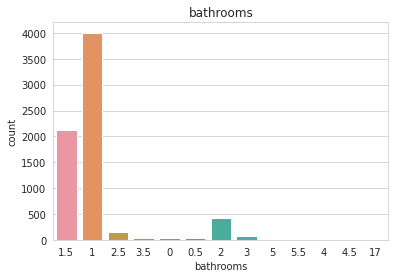

In [ ]:
print(ls['bathrooms'].value_counts())
sns.set_style("whitegrid")
sns.countplot(ls['bathrooms'],data =ls)
plt.title("bathrooms")


######Bathroom_text convert to bathrooms_type

In [ ]:
array = [308028, 12392592,10564421,291752]
ls['bathrooms_type'] = ls['bathrooms_text'].str.extract(r'(Private|private|Shared|shared)')
ls[['id','bathrooms_text','bathrooms','bathrooms_type']].loc[ls['id'].isin(array)]


,id,bathrooms_text,bathrooms,bathrooms_type
41,291752.0,1 bath,1,NaN
47,308028.0,Private 0.5-bath,0.5,Private
1311,10564421.0,0.5-bath,0.5,NaN
1442,12392592.0,Shared 0.5-bath,0.5,Shared


In [ ]:
ls['bathrooms_type'] = ls['bathrooms_type'].fillna('private')
ls['bathrooms_type'] = ls['bathrooms_type'].str.replace(r'Private', 'private', regex=True)
ls['bathrooms_type'] = ls['bathrooms_type'].str.replace(r'Shared', 'shared', regex=True)

In [ ]:
ls[['id','bathrooms_text','bathrooms','bathrooms_type']].loc[ls['id'].isin(array)]

,id,bathrooms_text,bathrooms,bathrooms_type
41,291752.0,1 bath,1,private
47,308028.0,Private 0.5-bath,0.5,private
1311,10564421.0,0.5-bath,0.5,private
1442,12392592.0,Shared 0.5-bath,0.5,shared


private    6298
shared      595
Name: bathrooms_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'bathrooms_type')

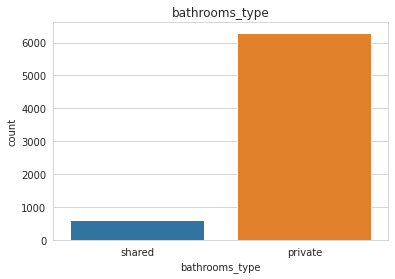

In [ ]:
print(ls['bathrooms_type'].value_counts())
sns.set_style("whitegrid")
sns.countplot(ls['bathrooms_type'],data =ls)
plt.title("bathrooms_type")

In [ ]:
ls = ls.drop(['bathrooms_text'], axis=1)

##Amenities (Word Cloud)

ทำการจัดการข้อมูล amenities และทำ word cloud เพื่อแยกสิ่งอำนวยความสะดวกที่ host นิยมใช้มากสุด และทำการแยก features ออกมา

######Word Cloud

In [ ]:
ls.amenities

0       ["Fire extinguisher", "Private entrance", "Lau...
1       ["Wifi", "Refrigerator", "TV", "Fire extinguis...
2       ["Safe", "Fire extinguisher", "Hp neutral, eco...
3       ["Wifi", "Shampoo", "Refrigerator", "Iron", "F...
4       ["Wifi", "Shampoo", "Refrigerator", "Iron", "F...
                              ...                        
6888    ["Fire extinguisher", "Board games", "Microwav...
6889    ["Fire extinguisher", "Microwave", "Free stree...
6890    ["Fire extinguisher", "Microwave", "Private en...
6891    ["Microwave", "Private entrance", "Oven", "Dis...
6892    ["Pocket wifi", "Fire extinguisher", "Microwav...
Name: amenities, Length: 6893, dtype: object

In [ ]:
word_col=ls.amenities

In [ ]:
all_words = " ".join(ls["amenities"]).lower()

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
print(stopwords)

{'k', 'which', 'is', 'then', 'about', 'off', 'get', 'myself', 'ought', "hadn't", 'we', "haven't", "why's", 'all', "who's", "that's", 'hence', 'of', 'into', "shouldn't", 'ever', 'so', "they'd", 'other', "we're", 'too', 'if', 'did', "you'd", 'above', "here's", 'below', 'but', 'before', 'else', 'its', 'themselves', 'until', 'between', 'that', "he'd", 'i', "let's", 'r', "how's", "hasn't", "you'll", 'however', 'their', "didn't", 'them', 'they', 'on', 'to', "we've", 'she', 'during', 'again', "weren't", "what's", 'doing', 'am', "she'll", "don't", 'also', "they're", 'or', 'do', 'at', "she'd", 'me', 'like', 'any', 'there', 'has', 'very', 'it', 'no', 'our', 'having', 'himself', 'own', 'shall', 'only', 'such', 'www', 'while', 'yourself', 'how', 'some', 'he', 'being', 'few', 'up', "isn't", "they'll", 'otherwise', "he'll", 'her', "i'm", 'are', 'be', 'does', 'not', 'been', 'than', 'same', 'out', 'over', 'whom', 'yourselves', 'because', 'further', 'ourselves', 'the', 'through', 'why', "won't", 'from'

<function matplotlib.pyplot.show(*args, **kw)>

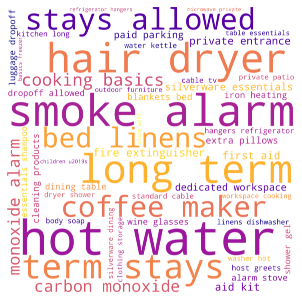

In [ ]:
wordcloud = WordCloud(stopwords=stopwords,width=5000,height=5000,colormap='plasma',max_words=50,background_color='white').generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

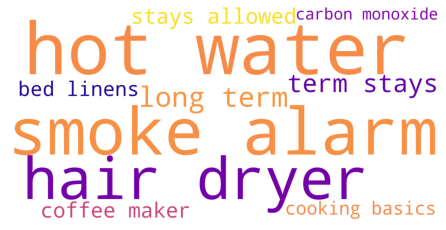

In [ ]:
wordcloud = WordCloud(stopwords=stopwords,width=2000,height=1000,colormap='plasma',max_words=10,background_color='white').generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

1.hot water
2.smoke alarm
3.hair dryer
4.term stays
5.long term
6.stay allowed
7.bed lines
8.coffee maker
9.cooking basics
10.carbom monoxide

######Convert amenities to equip

In [ ]:
ls['hot_water'] = ls['amenities'].str.extract(r'(Hot water)')
ls['hot_water'] = ls['hot_water'].fillna("No")
ls['hot_water']

ls['hair_dryer'] = ls['amenities'].str.extract(r'(Hair dryer)')
ls['hair_dryer'] = ls['hair_dryer'].fillna("No")
ls['hair_dryer']

ls['smoke_alarm'] = ls['amenities'].str.extract(r'(Smoke alarm)')
ls['smoke_alarm'] = ls['smoke_alarm'].fillna("No")
ls['smoke_alarm']

ls['bed_lines'] = ls['amenities'].str.extract(r'(Bed linens)')
ls['bed_lines'] = ls['bed_lines'].fillna("No")
ls['bed_lines']

ls['coffee_maker'] = ls['amenities'].str.extract(r'(Coffee maker)')
ls['coffee_maker'] = ls['coffee_maker'].fillna("No")
ls['coffee_maker']



0                 No
1                 No
2       Coffee maker
3       Coffee maker
4       Coffee maker
            ...     
6888    Coffee maker
6889    Coffee maker
6890    Coffee maker
6891    Coffee maker
6892    Coffee maker
Name: coffee_maker, Length: 6893, dtype: object

In [ ]:
ls['wifi'] = ls['amenities'].str.extract(r'(Wifi)')
ls['wifi'] = ls['wifi'].fillna("No")
ls['wifi']

ls['Cable_TV'] = ls['amenities'].str.extract(r'(Cable TV)')
ls['Cable_TV'] = ls['Cable_TV'].fillna("No")
ls['Cable_TV']

ls['Heating'] = ls['amenities'].str.extract(r'(Heating)')
ls['Heating'] = ls['Heating'].fillna("No")
ls['Heating']


ls['Bathtub'] = ls['amenities'].str.extract(r'(Bathtub)')
ls['Bathtub'] = ls['Bathtub'].fillna("No")
ls['Bathtub']

ls['Air_conditioning'] = ls['amenities'].str.extract(r'(Air conditioning)')
ls['Air_conditioning'] = ls['Air_conditioning'].fillna("No")
ls['Air_conditioning']


#ls['Housekeeping'] = ls['amenities'].str.extract(r'(Housekeeping)')
#ls['Housekeeping'] = ls['Housekeeping'].fillna("No")
#ls['Housekeeping']


#ls['Refrigerator'] = ls['amenities'].str.extract(r'(Refrigerator)')
#ls['Refrigerator'] = ls['Refrigerator'].fillna("No")
#ls['Refrigerator']


0                     No
1                     No
2                     No
3                     No
4                     No
              ...       
6888                  No
6889                  No
6890                  No
6891                  No
6892    Air conditioning
Name: Air_conditioning, Length: 6893, dtype: object

In [ ]:
#ls['description'] = ls['description'].str.lower()
#ls['1_kingbed'] = ls['description'].str.extract(r'(1 king)')
#ls['1_kingbed'] = ls['1_kingbed'].fillna("No")
#ls['1_kingbed']


#ls['1_queenbed'] = ls['description'].str.extract(r'(1 queen)')
#ls['1_queenbed'] = ls['1_queenbed'].fillna("No")
#ls['1_queenbed']

#ls['non_smoking'] = ls['description'].str.extract(r'(non smoking)')
#ls['non_smoking'] = ls['non_smoking'].fillna("No")
#ls['non_smoking']


#ls['sofa'] = ls['description'].str.extract(r'(sofa)')
#ls['sofa'] = ls['sofa'].fillna("No")
#ls['sofa']

######Convert amenities to amenities amount

In [ ]:
ls["amenities"] = ls["amenities"].str.lower()

In [ ]:
ls["amenities"] = ls["amenities"].apply(eval)

In [ ]:
ls["count_amenities"] = ls["amenities"].str.len()

In [ ]:
ls.head()

,id,source,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,hair_dryer,smoke_alarm,bed_lines,coffee_maker,wifi,Cable_TV,Heating,Bathtub,Air_conditioning,count_amenities
0,2818.0,city scrape,3159,14,within an hour,100%,100%,t,1,1,...,Hair dryer,Smoke alarm,Bed linens,No,No,No,No,No,No,40
1,20168.0,previous scrape,59484,13,within an hour,100%,98%,f,5,5,...,Hair dryer,Smoke alarm,Bed linens,No,Wifi,No,Heating,No,No,16
2,27886.0,city scrape,97647,12,within an hour,100%,100%,f,1,1,...,Hair dryer,Smoke alarm,Bed linens,Coffee maker,Wifi,Cable TV,No,No,No,44
3,28871.0,city scrape,124245,12,within an hour,100%,100%,t,2,2,...,Hair dryer,Smoke alarm,Bed linens,Coffee maker,Wifi,No,Heating,No,No,20
4,29051.0,city scrape,124245,12,within an hour,100%,100%,t,2,2,...,Hair dryer,Smoke alarm,Bed linens,Coffee maker,Wifi,No,Heating,No,No,19


In [ ]:
ls.drop(columns="amenities" , inplace=True)

## Licence

In [ ]:
ls['license'] = ls['license'].str.replace(' ', '')

In [ ]:
ls['have_license'] = ls['license'].fillna('No')

ls['have_license'] = np.where(ls['license'].str.len() == 20, 'Yes', ls['have_license'])


array = [1523635, 1570315,9356764,11175840,20024548, 32560952,680110471417251000,24786368,307497]

ls[['license','have_license']].loc[ls['id'].isin(array)]

,license,have_license
45,Exempt,Exempt
320,0363111A4F66221CA95C,Yes
328,0363111A4F66221CA95C,Yes
1216,Z2119657190000000000,Yes
1342,Z211954032U000000000,Yes
2300,Z2220787610000000000,Yes
2761,NaN,No
3373,Z211912212xxxxxxxxxx,Yes


In [ ]:
ls["have_license"].value_counts()

Yes       5844
Exempt     605
No         444
Name: have_license, dtype: int64

Yes       5844
Exempt     605
No         444
Name: have_license, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'have_license')

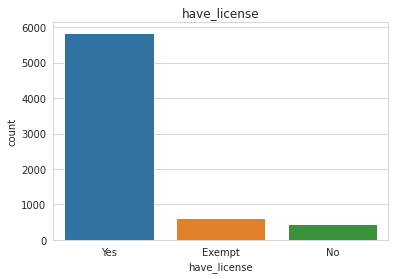

In [ ]:
print(ls['have_license'].value_counts())
sns.set_style("whitegrid")
sns.countplot(ls['have_license'],data =ls)
plt.title("have_license")

In [ ]:
ls.drop(columns="license" , inplace=True)

##จัดการ NULL

In [ ]:
havenull=ls[["bedrooms","beds","review_scores_rating","review_scores_value","review_scores_location","review_scores_communication","review_scores_checkin","review_scores_cleanliness","review_scores_accuracy","reviews_per_month"]]

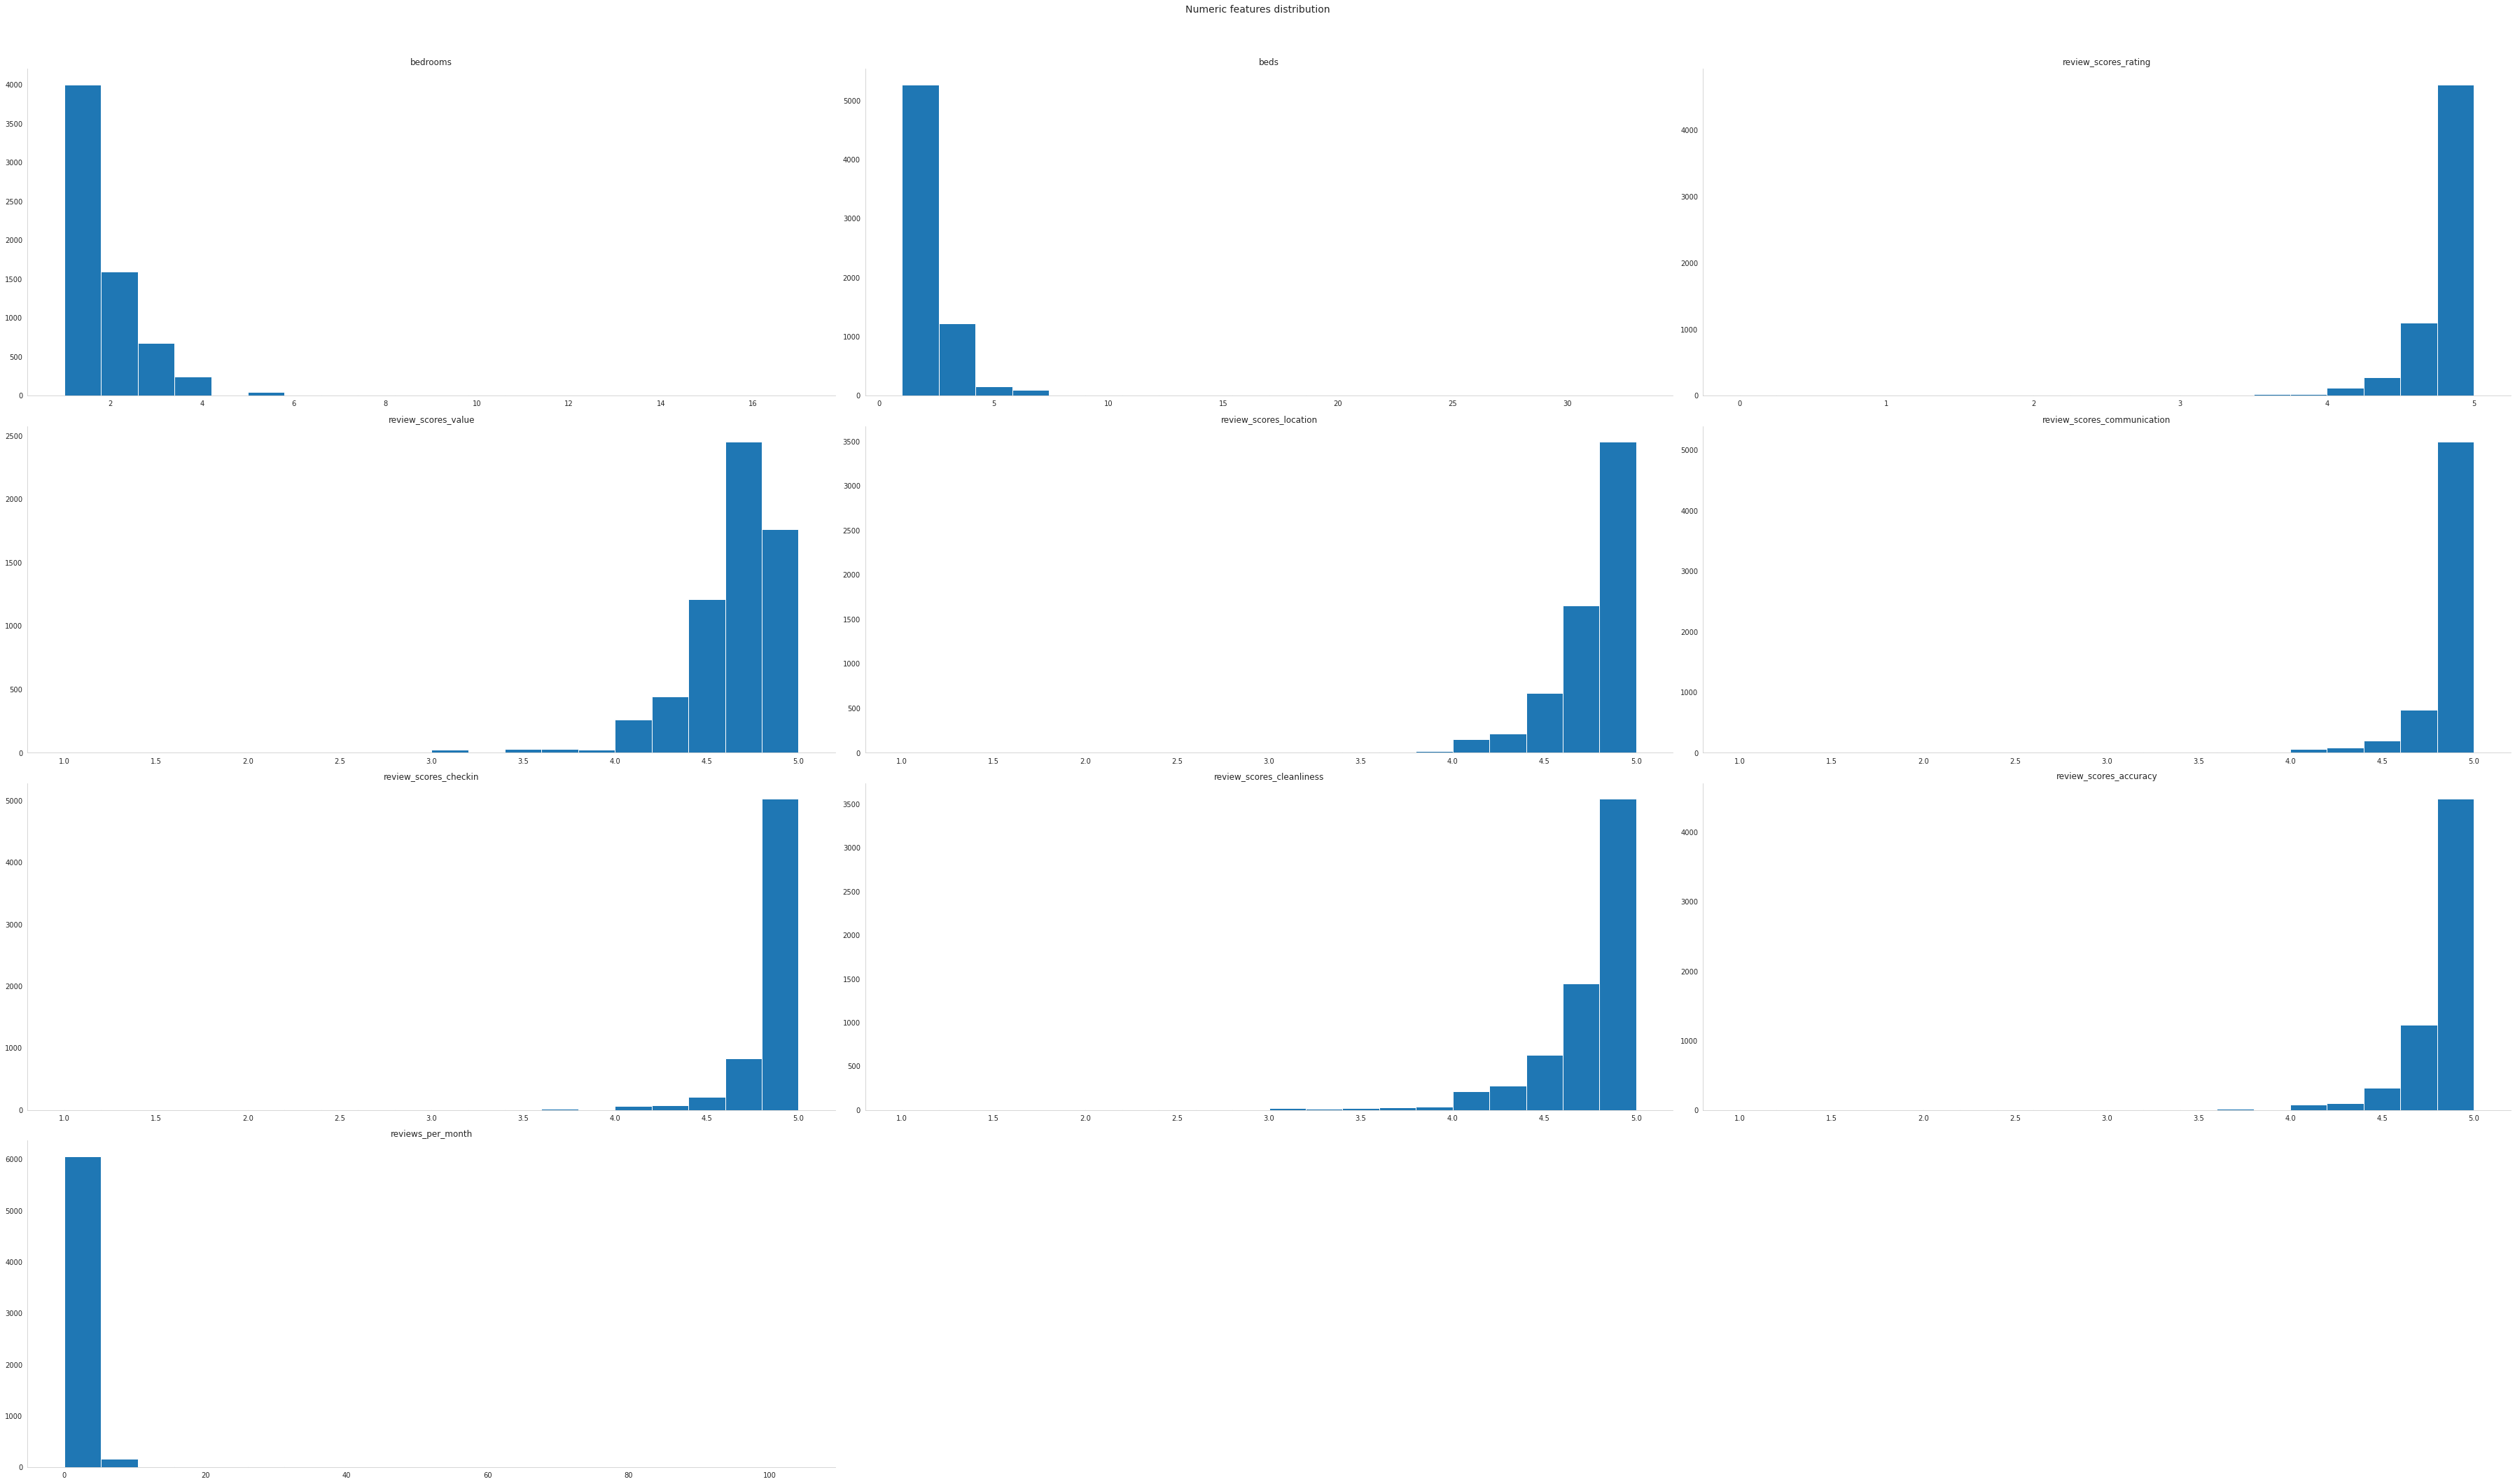

In [ ]:
havenull.hist(figsize=(50, 30), bins=20, grid=False)
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

กราฟส่วนใหญ่มีการเบไปทางใดทางนึง จึงใช้ค่า medien หรือ Mode ในการแทน

In [ ]:
null=["bedrooms","beds","review_scores_rating","review_scores_value","review_scores_location","review_scores_communication","review_scores_checkin","review_scores_cleanliness","review_scores_accuracy","reviews_per_month"]
for i in null:
  ls[i].fillna(ls[i].value_counts().idxmax(), inplace=True)

In [ ]:
catg_columns = ['host_response_time', 'host_acceptance_rate', 'host_response_rate','host_is_superhost']
for i in catg_columns:
  ls[i].fillna(ls[i].value_counts().idxmax(), inplace=True)

In [ ]:
ls.isnull().sum()

id                                              0
source                                          0
host_id                                         0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0


##Detect outlier

In [ ]:
cols_to_check_int = ls.select_dtypes(include="int").columns
cols_to_check_int

Index(['host_id', 'host_since', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'bin_of_lastreview',
       'count_amenities'],
      dtype='object')

In [ ]:
cols_to_check_float = ls.select_dtypes(include="float").columns
cols_to_check_float

Index(['id', 'latitude', 'longitude', 'bedrooms', 'beds',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [ ]:
outlier = ['host_listings_count','host_total_listings_count', 'accommodates', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','bedrooms', 'beds',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

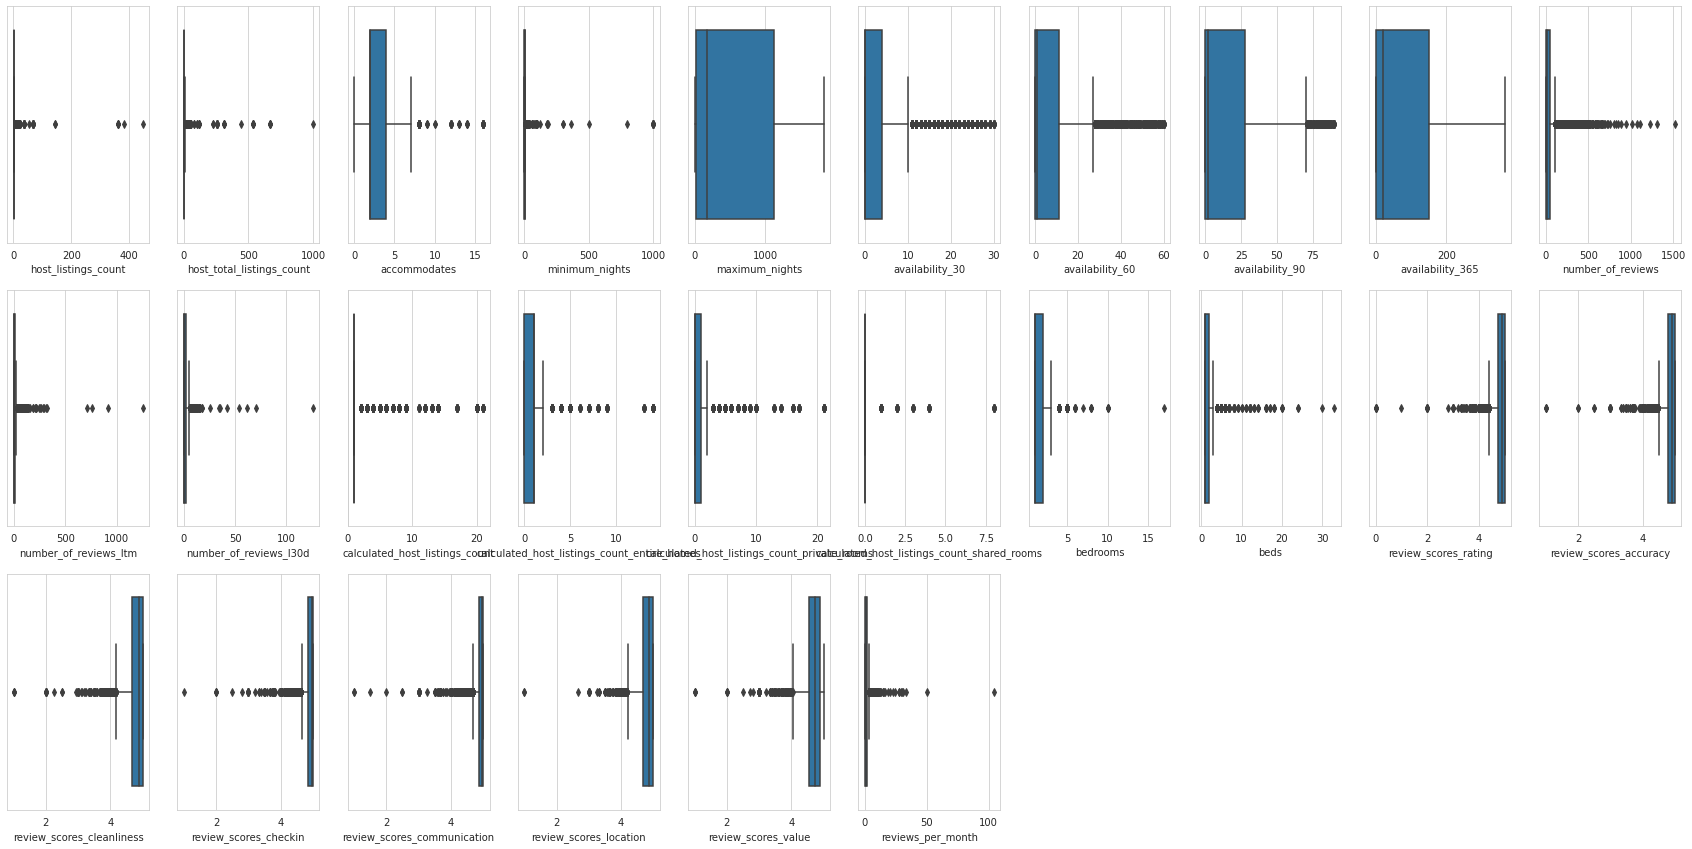

In [ ]:

plt.figure(figsize=(30,20))
for i in enumerate(outlier):
    plt.subplot(4,10,i[0]+1)
    sns.boxplot(ls[i[1]])

In [ ]:
ls_outlier=ls.copy()

In [ ]:
ls.shape

(6893, 60)

In [ ]:
ls_outlier.shape

(6893, 60)

In [ ]:
up = ['host_listings_count','host_total_listings_count', 'accommodates', 'minimum_nights','availability_30', 'availability_60',
      'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','bedrooms','beds','reviews_per_month']

In [ ]:
for i in enumerate(up):
    q1 = ls_outlier[i[1]].quantile(.10)
    q3 = ls_outlier[i[1]].quantile(.90)
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    filter_upper=ls_outlier[i[1]]>upper
    print(filter_upper.value_counts())
    ls_outlier.drop(ls_outlier[filter_upper].index , inplace=True)

False    6596
True      297
Name: host_listings_count, dtype: int64
False    6479
True      117
Name: host_total_listings_count, dtype: int64
False    6426
True       53
Name: accommodates, dtype: int64
False    6218
True      208
Name: minimum_nights, dtype: int64
False    6143
True       75
Name: availability_30, dtype: int64
False    6143
Name: availability_60, dtype: int64
False    6003
True      140
Name: number_of_reviews, dtype: int64
False    5952
True       51
Name: number_of_reviews_ltm, dtype: int64
False    5895
True       57
Name: number_of_reviews_l30d, dtype: int64
False    5621
True      274
Name: calculated_host_listings_count, dtype: int64
False    5551
True       70
Name: calculated_host_listings_count_entire_homes, dtype: int64
False    5440
True      111
Name: calculated_host_listings_count_private_rooms, dtype: int64
False    5430
True       10
Name: calculated_host_listings_count_shared_rooms, dtype: int64
False    5430
Name: bedrooms, dtype: int64
False    5414


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

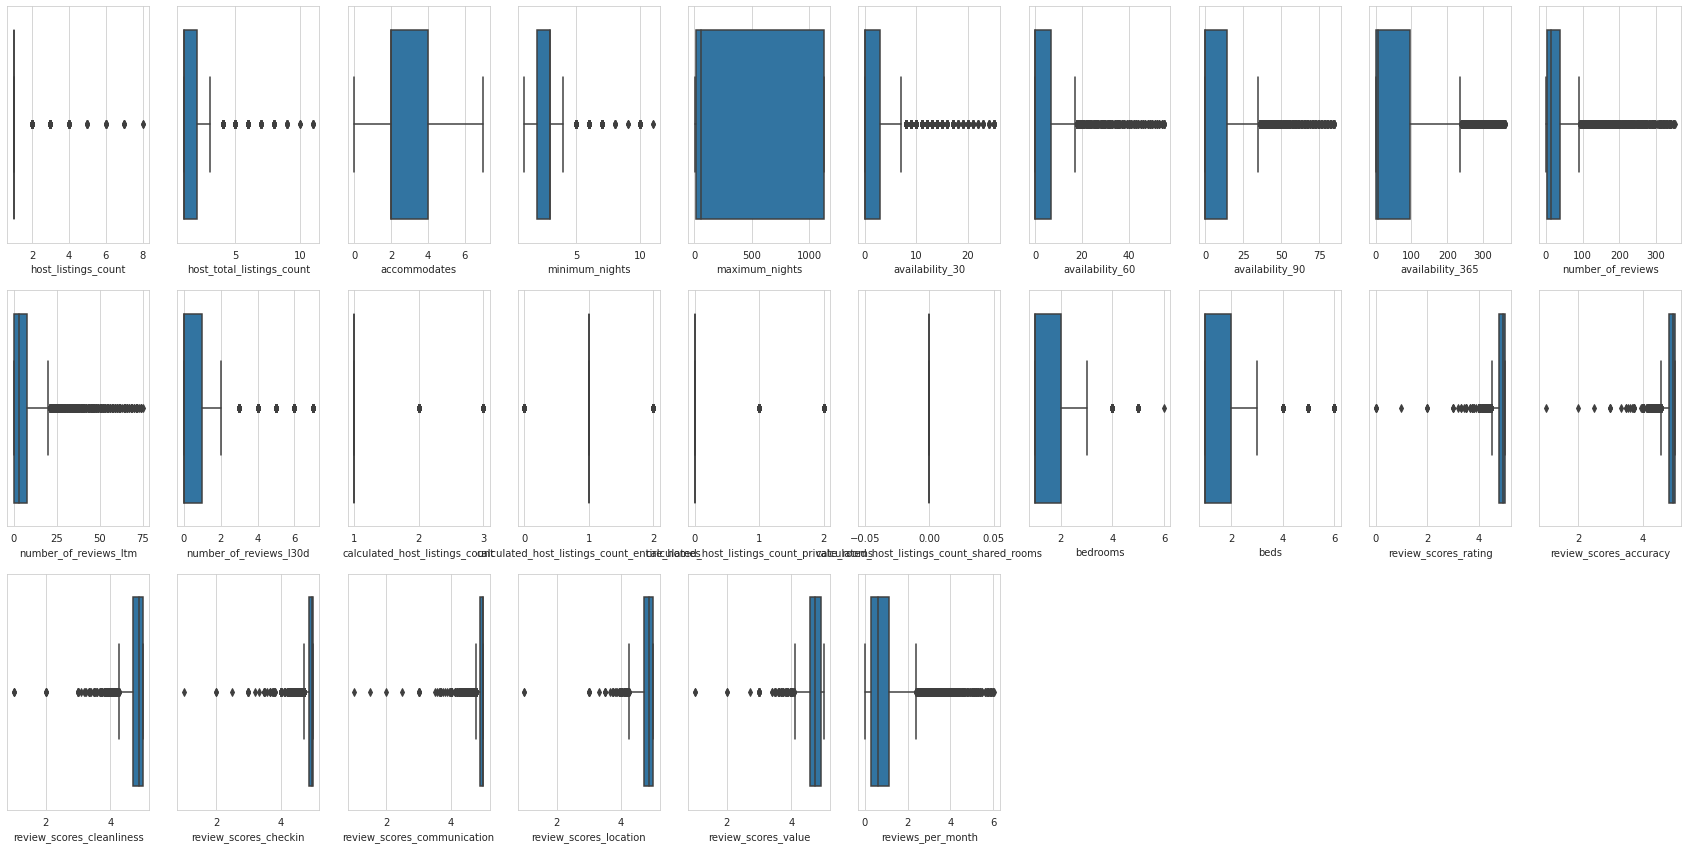

In [ ]:

plt.figure(figsize=(30,20))
for i in enumerate(outlier):
    plt.subplot(4,10,i[0]+1)
    sns.boxplot(ls_outlier[i[1]])

In [ ]:
down = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

In [ ]:
for i in enumerate(down):
    q1 = ls_outlier[i[1]].quantile(.10)
    q3 = ls_outlier[i[1]].quantile(.90)
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    filter_lower=ls_outlier[i[1]]<lower
    print(filter_lower.value_counts())
    ls_outlier.drop(ls_outlier[filter_lower].index , inplace=True)

False    5325
True       72
Name: review_scores_rating, dtype: int64
False    5287
True       38
Name: review_scores_accuracy, dtype: int64
False    5267
True       20
Name: review_scores_cleanliness, dtype: int64
False    5202
True       65
Name: review_scores_checkin, dtype: int64
False    5157
True       45
Name: review_scores_communication, dtype: int64
False    5151
True        6
Name: review_scores_location, dtype: int64
False    5145
True        6
Name: review_scores_value, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

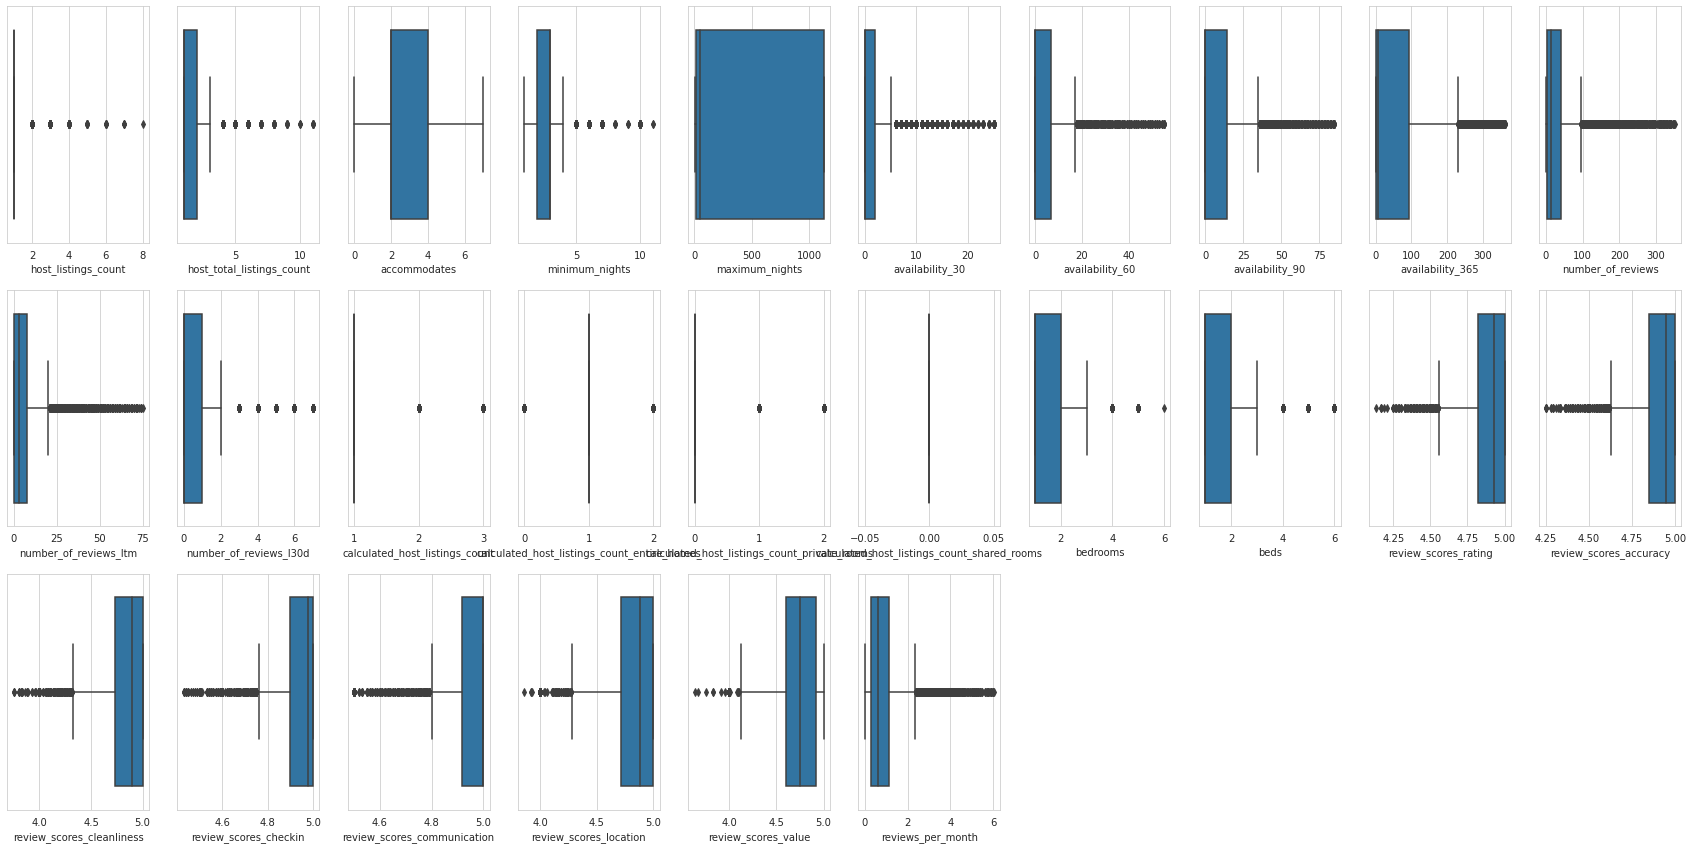

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(outlier):
    plt.subplot(4,10,i[0]+1)
    sns.boxplot(ls_outlier[i[1]])

In [ ]:
ls_outlier.shape

(5145, 60)

In [ ]:
ls = ls_outlier.copy()

##Convert datatype

ข้อมูลเป็น Rate เป็น percent อยู่ ทำการกำจัด % ให้แปลงข้อมูลกลับมาเป้น int

In [ ]:
#ตัด % ออกและแปลงเลขให้เป็น int
ls["host_acceptance_rate"] = ls["host_acceptance_rate"].str.replace("%","")
ls["host_response_rate"] = ls["host_response_rate"].str.replace("%","")


In [ ]:
ls.host_acceptance_rate = ls.host_acceptance_rate.astype("int")
ls.host_response_rate = ls.host_response_rate.astype("int")

In [ ]:
ls.isAmsterdam = ls.isAmsterdam.astype("int")
ls.bathrooms = ls.bathrooms.astype("float")

In [ ]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5145 entries, 0 to 6892
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5145 non-null   float64
 1   source                                        5145 non-null   object 
 2   host_id                                       5145 non-null   int64  
 3   host_since                                    5145 non-null   int64  
 4   host_response_time                            5145 non-null   object 
 5   host_response_rate                            5145 non-null   int64  
 6   host_acceptance_rate                          5145 non-null   int64  
 7   host_is_superhost                             5145 non-null   object 
 8   host_listings_count                           5145 non-null   int64  
 9   host_total_listings_count                     5145 non-null   i

In [ ]:
ls.price

0        $49.00 
1       $106.00 
2       $136.00 
5       $240.00 
7       $124.00 
          ...   
6887    $140.00 
6889    $195.00 
6890    $449.00 
6891    $282.00 
6892    $200.00 
Name: price, Length: 5145, dtype: object

In [ ]:
ls.price = ls.price.str.replace(r'[^0-9.]','',regex=True).astype('float64')

##Price to logprice

In [ ]:
ls.price

0        49.0
1       106.0
2       136.0
5       240.0
7       124.0
        ...  
6887    140.0
6889    195.0
6890    449.0
6891    282.0
6892    200.0
Name: price, Length: 5145, dtype: float64

In [ ]:
ls= ls[ls.price > 0]

In [ ]:
from scipy.stats import norm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

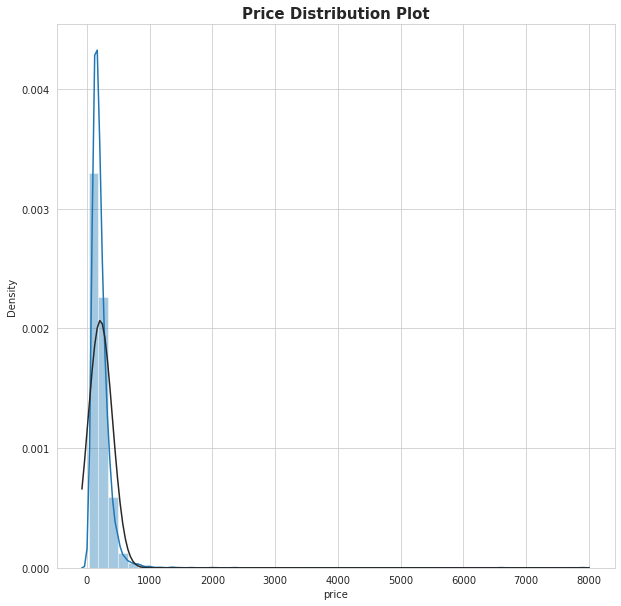

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(ls['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [ ]:
ls['price'] = np.log(ls.price+1)

In [ ]:
ls['price']

0       3.912023
1       4.672829
2       4.919981
5       5.484797
7       4.828314
          ...   
6887    4.948760
6889    5.278115
6890    6.109248
6891    5.645447
6892    5.303305
Name: price, Length: 5139, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

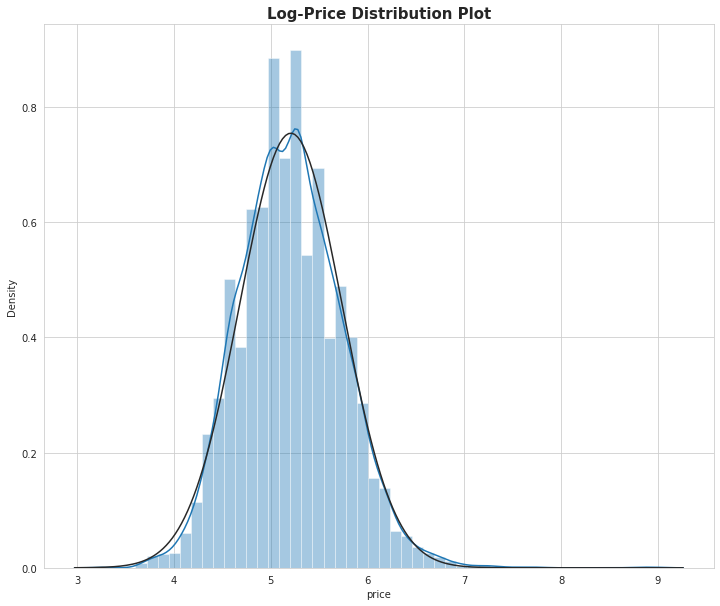

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(ls['price'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

In [ ]:
#ls.price = np.exp(ls.price)-1

In [ ]:
#ls.price

##Area map

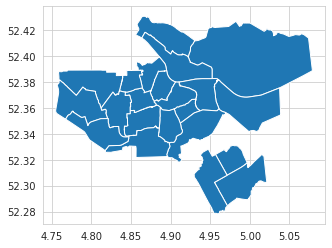

In [ ]:
gdf.plot();

In [ ]:
ls = ls.rename(columns={
    'neighbourhood_cleansed':'neighbourhood',
    })

In [ ]:
geo_cols = ['neighbourhood', 'geometry']
res_gdf = gdf.loc[:, geo_cols]
res_gdf.head()

,neighbourhood,geometry
0,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4..."
1,Noord-Oost,"MULTIPOLYGON Z (((5.07916 52.38865 42.95663, 5..."
2,Noord-West,"MULTIPOLYGON Z (((4.93072 52.41161 42.91539, 4..."
3,Oud-Noord,"MULTIPOLYGON Z (((4.95242 52.38983 42.95411, 4..."
4,IJburg - Zeeburgereiland,"MULTIPOLYGON Z (((5.03906 52.35458 43.01664, 5..."


In [ ]:
#Area of the neighbourhood in square kilometers

res_gdf['area_sq_km'] = (res_gdf['geometry'].to_crs({'init': 'epsg:3395'})
                                    .map(lambda p: p.area / 10**6))

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
res_gdf

,neighbourhood,geometry,area_sq_km
0,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",10.866307
1,Noord-Oost,"MULTIPOLYGON Z (((5.07916 52.38865 42.95663, 5...",124.334111
2,Noord-West,"MULTIPOLYGON Z (((4.93072 52.41161 42.91539, 4...",22.346879
3,Oud-Noord,"MULTIPOLYGON Z (((4.95242 52.38983 42.95411, 4...",24.078049
4,IJburg - Zeeburgereiland,"MULTIPOLYGON Z (((5.03906 52.35458 43.01664, 5...",36.819207
5,Centrum-West,"MULTIPOLYGON Z (((4.90640 52.38004 42.97078, 4...",9.576438
6,Oostelijk Havengebied - Indische Buurt,"MULTIPOLYGON Z (((4.96131 52.35913 43.00823, 4...",14.930406
7,Centrum-Oost,"MULTIPOLYGON Z (((4.93297 52.37041 42.98810, 4...",11.915356
8,Oud-Oost,"MULTIPOLYGON Z (((4.93743 52.35774 43.01043, 4...",5.855945
9,Watergraafsmeer,"MULTIPOLYGON Z (((4.96971 52.35636 43.01317, 4...",24.087303


In [ ]:
ls = res_gdf.merge(ls, how='inner', on='neighbourhood')

In [ ]:
ls

,neighbourhood,geometry,area_sq_km,id,source,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,smoke_alarm,bed_lines,coffee_maker,wifi,Cable_TV,Heating,Bathtub,Air_conditioning,count_amenities,have_license
0,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",10.866307,2.942229e+06,city scrape,1271678,11,within a few hours,100,100,...,Smoke alarm,No,No,Wifi,No,Heating,No,No,20,Yes
1,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",10.866307,1.326267e+07,previous scrape,9015391,9,within an hour,100,92,...,Smoke alarm,No,No,Wifi,No,Heating,No,No,15,Yes
2,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",10.866307,1.488466e+07,previous scrape,9015391,9,within an hour,100,92,...,Smoke alarm,Bed linens,Coffee maker,Wifi,Cable TV,Heating,Bathtub,No,34,Yes
3,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",10.866307,1.588682e+07,city scrape,47499392,7,within an hour,100,100,...,Smoke alarm,No,Coffee maker,Wifi,Cable TV,Heating,No,No,30,Yes
4,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",10.866307,1.875084e+07,previous scrape,31812735,7,within an hour,100,100,...,Smoke alarm,No,No,Wifi,Cable TV,Heating,No,No,17,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5134,De Aker - Nieuw Sloten,"MULTIPOLYGON Z (((4.84713 52.33690 43.04548, 4...",20.237329,6.700890e+17,city scrape,19155073,8,within an hour,100,62,...,Smoke alarm,Bed linens,Coffee maker,No,No,No,No,No,31,No
5135,De Aker - Nieuw Sloten,"MULTIPOLYGON Z (((4.84713 52.33690 43.04548, 4...",20.237329,5.069276e+07,city scrape,88461081,6,within an hour,100,95,...,Smoke alarm,Bed linens,Coffee maker,Wifi,No,No,No,No,27,No
5136,De Aker - Nieuw Sloten,"MULTIPOLYGON Z (((4.84713 52.33690 43.04548, 4...",20.237329,3.541171e+07,city scrape,74110394,6,within a few hours,100,67,...,Smoke alarm,Bed linens,Coffee maker,Wifi,Cable TV,Heating,No,No,59,No
5137,De Aker - Nieuw Sloten,"MULTIPOLYGON Z (((4.84713 52.33690 43.04548, 4...",20.237329,4.167660e+07,city scrape,4530387,10,within a day,90,0,...,Smoke alarm,No,No,Wifi,No,Heating,No,No,25,No


In [ ]:
ls.drop(columns="geometry" , inplace=True)

##Distance

In [ ]:
# Installing “haversine”
#Haversine Distance can be defined as the angular distance between two locations on the Earth’s surface.
!pip install haversine
import haversine as hs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#The coordinates of airport station in Amsterdam
latitudeCR = 52.310539
longitudeCR = 4.768274

# The coordinates of Amsterdam center
latitudeAC = 52.372952
longitudeAC = 4.906080



In [ ]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    All args must be of equal length.
    """

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])


    ''' Feed longitude first and latitude second'''


    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  #6367
    return km



In [ ]:
#Distance from Homes & Apartment Rentals to Central Railway station in Amsterdam
ls['distance_to_airport(kms)'] = haversine_np(longitudeCR,latitudeCR,ls['longitude'],ls['latitude'])


#Distance from Homes & Apartment Rentals to Amsterdam center
ls['distance_to_Amsterdam_center(kms)'] = haversine_np(longitudeAC,latitudeAC,ls['longitude'],ls['latitude'])


##Markets(NewDataset)

In [ ]:
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.point import Point

In [ ]:
gdf1 = gpd.GeoDataFrame(ls,geometry=gpd.points_from_xy(ls['longitude'], ls['latitude']))

In [ ]:
ls

,neighbourhood,area_sq_km,id,source,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,wifi,Cable_TV,Heating,Bathtub,Air_conditioning,count_amenities,have_license,distance_to_airport(kms),distance_to_Amsterdam_center(kms),geometry
0,Bijlmer-Oost,10.866307,2.942229e+06,city scrape,1271678,11,within a few hours,100,100,t,...,Wifi,No,Heating,No,No,20,Yes,14.325131,7.115167,POINT (4.97748 52.32613)
1,Bijlmer-Oost,10.866307,1.326267e+07,previous scrape,9015391,9,within an hour,100,92,t,...,Wifi,No,Heating,No,No,15,Yes,13.293957,7.051642,POINT (4.96323 52.32001)
2,Bijlmer-Oost,10.866307,1.488466e+07,previous scrape,9015391,9,within an hour,100,92,t,...,Wifi,Cable TV,Heating,Bathtub,No,34,Yes,13.391092,7.080494,POINT (4.96463 52.32027)
3,Bijlmer-Oost,10.866307,1.588682e+07,city scrape,47499392,7,within an hour,100,100,f,...,Wifi,Cable TV,Heating,No,No,30,Yes,14.947417,7.947626,POINT (4.98743 52.32158)
4,Bijlmer-Oost,10.866307,1.875084e+07,previous scrape,31812735,7,within an hour,100,100,f,...,Wifi,Cable TV,Heating,No,No,17,Yes,14.490047,7.031174,POINT (4.97946 52.32835)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5134,De Aker - Nieuw Sloten,20.237329,6.700890e+17,city scrape,19155073,8,within an hour,100,62,f,...,No,No,No,No,No,31,No,3.578327,9.126557,POINT (4.78186 52.34163)
5135,De Aker - Nieuw Sloten,20.237329,5.069276e+07,city scrape,88461081,6,within an hour,100,95,t,...,Wifi,No,No,No,No,27,No,4.019860,9.313759,POINT (4.77601 52.34638)
5136,De Aker - Nieuw Sloten,20.237329,3.541171e+07,city scrape,74110394,6,within a few hours,100,67,f,...,Wifi,Cable TV,Heating,No,No,59,No,2.794051,9.821129,POINT (4.77527 52.33530)
5137,De Aker - Nieuw Sloten,20.237329,4.167660e+07,city scrape,4530387,10,within a day,90,0,f,...,Wifi,No,Heating,No,No,25,No,3.394489,9.090527,POINT (4.78392 52.33953)


In [ ]:
mk

,OBJECTNUMMER,Standplaats_ID,Straatnaam,Verkoopwaar,Mobiel_Vast,Food_NonFood,Verkoopwaarcode,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,1,1,Jan van Galenstraat,IJs,Vast,Food Consumptie,203.0,POINT(4.8604542 52.3748229),POINT(52.3748229 4.8604542),4.860454,52.374823
1,2,2,Buikslotermeerplein,Bloemen en Planten,Vast,Non Food,302.0,POINT(4.9365746 52.3978685),POINT(52.3978685 4.9365746),4.936575,52.397869
2,3,3,Cuserstraat,Bloemen en Planten,Vast,Non Food,302.0,POINT(4.8581968 52.32368),POINT(52.32368 4.8581968),4.858197,52.323680
3,4,4,Bijlmerplein,Bloemen en Planten,Vast,Non Food,302.0,POINT(4.9498817 52.3130719),POINT(52.3130719 4.9498817),4.949882,52.313072
4,5,5,Marie Altelaarplein / Wittenburgergracht,Bloemen en Planten,Vast,Non Food,302.0,POINT(4.925055 52.367771),POINT(52.367771 4.925055),4.925055,52.367771
...,...,...,...,...,...,...,...,...,...,...,...
279,280,280,Admiraal de Ruijterweg,Onbekend,Vast,Onbekend,999.0,POINT(4.8590855 52.3722074),POINT(52.3722074 4.8590855),4.859085,52.372207
280,281,281,Kwakersplein,Onbekend,Vast,Onbekend,999.0,POINT(4.8703608 52.3687849),POINT(52.3687849 4.8703608),4.870361,52.368785
281,282,282,Schinkelhavenkade,Onbekend,Vast,Onbekend,999.0,POINT(4.8544505 52.3561985),POINT(52.3561985 4.8544505),4.854450,52.356198
282,283,283,Nassauplein,Onbekend,Vast,Onbekend,999.0,POINT(4.881098 52.385377),POINT(52.385377 4.881098),4.881098,52.385377


In [ ]:
merge_mk = (ls.assign(point=1)
    .merge(mk.assign(point=1),on='point')
    .query('abs(latitude-LAT)<=0.05 and abs(longitude-LNG)<=0.05')
    .drop('point', axis=1)
)

In [ ]:
merge_mk

,neighbourhood,area_sq_km,id,source,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,Standplaats_ID,Straatnaam,Verkoopwaar,Mobiel_Vast,Food_NonFood,Verkoopwaarcode,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
3,Bijlmer-Oost,10.866307,2942229.0,city scrape,1271678,11,within a few hours,100,100,t,...,4,Bijlmerplein,Bloemen en Planten,Vast,Non Food,302.0,POINT(4.9498817 52.3130719),POINT(52.3130719 4.9498817),4.949882,52.313072
26,Bijlmer-Oost,10.866307,2942229.0,city scrape,1271678,11,within a few hours,100,100,t,...,286,Middenweg,Bloemen en Planten,Vast,Non Food,302.0,POINT(4.9502217 52.3418333),POINT(52.3418333 4.9502217),4.950222,52.341833
29,Bijlmer-Oost,10.866307,2942229.0,city scrape,1271678,11,within a few hours,100,100,t,...,30,Oostelijke Handelskade,Bloemen en Planten,Vast,Non Food,302.0,POINT(4.9388628 52.3737363),POINT(52.3737363 4.9388628),4.938863,52.373736
35,Bijlmer-Oost,10.866307,2942229.0,city scrape,1271678,11,within a few hours,100,100,t,...,36,Van Eesterenlaan,Bloemen en Planten,Vast,Non Food,302.0,POINT(4.9388276 52.3712703),POINT(52.3712703 4.9388276),4.938828,52.371270
52,Bijlmer-Oost,10.866307,2942229.0,city scrape,1271678,11,within a few hours,100,100,t,...,53,Helmholtzstraat,Bloemen en Planten,Vast,Non Food,302.0,POINT(4.9384901 52.3502938),POINT(52.3502938 4.9384901),4.938490,52.350294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459301,De Aker - Nieuw Sloten,20.237329,31632825.0,previous scrape,18200072,8,within an hour,100,97,t,...,110,Osdorpplein,AGF,Vast,Food Meenemen,101.0,POINT(4.8034933 52.3591633),POINT(52.3591633 4.8034933),4.803493,52.359163
1459320,De Aker - Nieuw Sloten,20.237329,31632825.0,previous scrape,18200072,8,within an hour,100,97,t,...,129,Osdorpplein,Oliebollen,Tijdelijk Vast,Food Meenemen,106.0,POINT(4.8070201 52.3596945),POINT(52.3596945 4.8070201),4.807020,52.359695
1459321,De Aker - Nieuw Sloten,20.237329,31632825.0,previous scrape,18200072,8,within an hour,100,97,t,...,130,Belgiëplein,Oliebollen,Tijdelijk Vast,Food Meenemen,106.0,POINT(4.811179 52.3457617),POINT(52.3457617 4.811179),4.811179,52.345762
1459326,De Aker - Nieuw Sloten,20.237329,31632825.0,previous scrape,18200072,8,within an hour,100,97,t,...,135,Plein 40-45,Oliebollen,Tijdelijk Vast,Food Meenemen,106.0,POINT(4.8214488 52.3801873),POINT(52.3801873 4.8214488),4.821449,52.380187


In [ ]:
merge_mk.Food_NonFood.value_counts()

Non Food           330744
Food Meenemen      221388
Food Consumptie    128225
Onbekend           108412
Name: Food_NonFood, dtype: int64

In [ ]:
group_mk = merge_mk.groupby(['id','Food_NonFood']).size()
group_mk = group_mk.to_frame().reset_index()
group_mk.columns = ['id', 'Food_NonFood', 'count']

In [ ]:
group_mk

,id,Food_NonFood,count
0,2.818000e+03,Food Consumptie,18
1,2.818000e+03,Food Meenemen,26
2,2.818000e+03,Non Food,39
3,2.016800e+04,Food Consumptie,33
4,2.016800e+04,Food Meenemen,54
...,...,...,...
19806,7.098640e+17,Onbekend,29
19807,7.099070e+17,Food Consumptie,26
19808,7.099070e+17,Food Meenemen,50
19809,7.099070e+17,Non Food,79


In [ ]:
group_mk = group_mk.pivot_table('count', ['id'], 'Food_NonFood')

In [ ]:
group_mk

Food_NonFood,Food Consumptie,Food Meenemen,Non Food,Onbekend
id,,,,
2.818000e+03,18.0,26.0,39.0,NaN
2.016800e+04,33.0,54.0,91.0,30.0
2.788600e+04,23.0,50.0,75.0,24.0
4.439100e+04,23.0,51.0,74.0,22.0
5.052300e+04,28.0,54.0,80.0,31.0
...,...,...,...,...
7.097380e+17,28.0,21.0,31.0,NaN
7.098140e+17,25.0,52.0,73.0,25.0
7.098520e+17,10.0,17.0,19.0,9.0


In [ ]:
ls = pd.merge(group_mk, ls, how='inner', left_on='id', right_on='id')

In [ ]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5130 entries, 0 to 5129
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            5130 non-null   float64 
 1   Food Consumptie                               5058 non-null   float64 
 2   Food Meenemen                                 5111 non-null   float64 
 3   Non Food                                      5128 non-null   float64 
 4   Onbekend                                      4530 non-null   float64 
 5   neighbourhood                                 5130 non-null   object  
 6   area_sq_km                                    5130 non-null   float64 
 7   source                                        5130 non-null   object  
 8   host_id                                       5130 non-null   int64   
 9   host_since                                    5130 n

In [ ]:
ls.drop(columns="Onbekend" , inplace=True)

In [ ]:
ls.isnull().sum()

id                                    0
Food Consumptie                      72
Food Meenemen                        19
Non Food                              2
neighbourhood                         0
                                     ..
count_amenities                       0
have_license                          0
distance_to_airport(kms)              0
distance_to_Amsterdam_center(kms)     0
geometry                              0
Length: 67, dtype: int64

In [ ]:
null=['Food Consumptie', 'Food Meenemen', 'Non Food']
for i in null:
  ls[i].fillna(0,inplace=True)

##Metro(NewDataSet)

In [ ]:
mt

,OBJECTNUMMER,Naam,Modaliteit,Lijn,Lijn_select,RADIUS,Label,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,1,Nieuwezijds Kolk,Tram,2 | 12 | 13 | 17,02|12|13|17,5,2 | 12 | 13 | 17 - Nieuwezijds Kolk,POINT(4.893344 52.376071),POINT(52.376071 4.893344),4.893344,52.376071
1,2,Surinameplein / Curaçaostraat,Tram,1 | 17 | 27,01|17|27,5,1 | 17 | 27 - Surinameplein / Curaçaostraat,POINT(4.853117 52.358384),POINT(52.358384 4.853117),4.853117,52.358384
2,3,Johan Huizingalaan,Tram,1 | 17 | 27,01|17|27,5,1 | 17 | 27 - Johan Huizingalaan,POINT(4.827325 52.357816),POINT(52.357816 4.827325),4.827325,52.357816
3,5,Prinsengracht,Tram,2 | 12,02|12,5,2 | 12 - Prinsengracht,POINT(4.884466 52.365024),POINT(52.365024 4.884466),4.884466,52.365024
4,6,Keizergracht,Tram,2 | 12,02|12,5,2 | 12 - Keizergracht,POINT(4.886446 52.365963),POINT(52.365963 4.886446),4.886446,52.365963
...,...,...,...,...,...,...,...,...,...,...,...
226,240,Meent,Tram,25,25,5,25 - Meent,POINT(4.8571498 52.2810117),POINT(52.2810117 4.8571498),4.857150,52.281012
227,241,Brink,Tram,25,25,5,25 - Brink,POINT(4.8518489 52.2805421),POINT(52.2805421 4.8518489),4.851849,52.280542
228,242,Poortwachter,Tram,25,25,5,25 - Poortwachter,POINT(4.8454439 52.2832311),POINT(52.2832311 4.8454439),4.845444,52.283231
229,243,Sacharovlaan,Tram,25,25,5,25 - Sacharovlaan,POINT(4.8324823 52.2822746),POINT(52.2822746 4.8324823),4.832482,52.282275


In [ ]:
merge_mt = (ls.assign(point=1)
    .merge(mt.assign(point=1),on='point')
    .query('abs(latitude-LAT)<=0.05 and abs(longitude-LNG)<=0.05')
    .drop('point', axis=1)
)

In [ ]:
merge_mt

,id,Food Consumptie,Food Meenemen,Non Food,neighbourhood,area_sq_km,source,host_id,host_since,host_response_time,...,Naam,Modaliteit,Lijn,Lijn_select,RADIUS,Label,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
14,2.818000e+03,18.0,26.0,39.0,Oostelijk Havengebied - Indische Buurt,14.930406,city scrape,3159,14,within an hour,...,Kruislaan,Tram,19,19,5,19 - Kruislaan,POINT(4.94019 52.347758),POINT(52.347758 4.94019),4.940190,52.347758
15,2.818000e+03,18.0,26.0,39.0,Oostelijk Havengebied - Indische Buurt,14.930406,city scrape,3159,14,within an hour,...,Brinkstraat,Tram,19,19,5,19 - Brinkstraat,POINT(4.947649 52.343074),POINT(52.343074 4.947649),4.947649,52.343074
16,2.818000e+03,18.0,26.0,39.0,Oostelijk Havengebied - Indische Buurt,14.930406,city scrape,3159,14,within an hour,...,Arent Krijtstraat,Tram,19,19,5,19 - Arent Krijtstraat,POINT(4.954533 52.33961),POINT(52.33961 4.954533),4.954533,52.339610
17,2.818000e+03,18.0,26.0,39.0,Oostelijk Havengebied - Indische Buurt,14.930406,city scrape,3159,14,within an hour,...,Diemerbrug,Tram,19,19,5,19 - Diemerbrug,POINT(4.9612609 52.3382985),POINT(52.3382985 4.9612609),4.961261,52.338299
18,2.818000e+03,18.0,26.0,39.0,Oostelijk Havengebied - Indische Buurt,14.930406,city scrape,3159,14,within an hour,...,Diemen Sniep,Tram,19,19,5,19 - Diemen Sniep,POINT(4.969577 52.336763),POINT(52.336763 4.969577),4.969577,52.336763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185017,7.099070e+17,26.0,50.0,79.0,Zuid,14.423590,city scrape,478375422,0,within an hour,...,VUmc,Tram,24,24,5,24 - VUmc,POINT(4.8598291 52.3351784),POINT(52.3351784 4.8598291),4.859829,52.335178
1185018,7.099070e+17,26.0,50.0,79.0,Zuid,14.423590,city scrape,478375422,0,within an hour,...,Muntplein,Tram,24,24,5,24 - Muntplein,POINT(4.8931841 52.366371),POINT(52.366371 4.8931841),4.893184,52.366371
1185019,7.099070e+17,26.0,50.0,79.0,Zuid,14.423590,city scrape,478375422,0,within an hour,...,Kronenburg,Tram,5 | 25,05|25,5,5 | 25 - Kronenburg,POINT(4.8703396 52.3164517),POINT(52.3164517 4.8703396),4.870340,52.316452
1185021,7.099070e+17,26.0,50.0,79.0,Zuid,14.423590,city scrape,478375422,0,within an hour,...,Eerste Marnixdwarsstraat,Tram,5,5,5,5 - Eerste Marnixdwarsstraat,POINT(4.8820335 52.3830358),POINT(52.3830358 4.8820335),4.882034,52.383036


In [ ]:
merge_mt.Modaliteit.value_counts()

Tram     531542
Metro     93529
Name: Modaliteit, dtype: int64

In [ ]:
group_mt = merge_mt.groupby(['id','Modaliteit']).size()
group_mt = group_mt.to_frame().reset_index()
group_mt.columns = ['id', 'Modaliteit', 'count']

In [ ]:
group_mt

,id,Modaliteit,count
0,2.818000e+03,Metro,18
1,2.818000e+03,Tram,58
2,2.016800e+04,Metro,21
3,2.016800e+04,Tram,131
4,2.788600e+04,Metro,16
...,...,...,...
10089,7.098520e+17,Tram,62
10090,7.098640e+17,Metro,20
10091,7.098640e+17,Tram,126
10092,7.099070e+17,Metro,25


In [ ]:
group_mt = group_mt.pivot_table('count', ['id'], 'Modaliteit')

In [ ]:
group_mt

Modaliteit,Metro,Tram
id,,
2.818000e+03,18.0,58.0
2.016800e+04,21.0,131.0
2.788600e+04,16.0,122.0
4.439100e+04,20.0,107.0
5.052300e+04,26.0,129.0
...,...,...
7.097380e+17,20.0,49.0
7.098140e+17,24.0,125.0
7.098520e+17,8.0,62.0


In [ ]:
ls = pd.merge(group_mt, ls, how='inner', left_on='id', right_on='id')

In [ ]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5103 entries, 0 to 5102
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            5103 non-null   float64 
 1   Metro                                         5056 non-null   float64 
 2   Tram                                          5046 non-null   float64 
 3   Food Consumptie                               5103 non-null   float64 
 4   Food Meenemen                                 5103 non-null   float64 
 5   Non Food                                      5103 non-null   float64 
 6   neighbourhood                                 5103 non-null   object  
 7   area_sq_km                                    5103 non-null   float64 
 8   source                                        5103 non-null   object  
 9   host_id                                       5103 n

In [ ]:
ls.drop(columns="geometry" , inplace=True)

In [ ]:
ls.isnull().sum()

id                                    0
Metro                                47
Tram                                 57
Food Consumptie                       0
Food Meenemen                         0
                                     ..
Air_conditioning                      0
count_amenities                       0
have_license                          0
distance_to_airport(kms)              0
distance_to_Amsterdam_center(kms)     0
Length: 68, dtype: int64

In [ ]:
null=['Metro', 'Tram']
for i in null:
  ls[i].fillna(0,inplace=True)

หา Dataset เพิ่ม 2 ชุด
จัดการ id

##Copy Data

In [ ]:
ls

,id,Metro,Tram,Food Consumptie,Food Meenemen,Non Food,neighbourhood,area_sq_km,source,host_id,...,coffee_maker,wifi,Cable_TV,Heating,Bathtub,Air_conditioning,count_amenities,have_license,distance_to_airport(kms),distance_to_Amsterdam_center(kms)
0,2.818000e+03,18.0,58.0,18.0,26.0,39.0,Oostelijk Havengebied - Indische Buurt,14.930406,city scrape,3159,...,No,No,No,No,No,No,40,Yes,13.329000,2.719740
1,2.016800e+04,21.0,131.0,33.0,54.0,91.0,Centrum-Oost,11.915356,previous scrape,59484,...,No,Wifi,No,Heating,No,No,16,Yes,10.407463,1.286813
2,2.788600e+04,16.0,122.0,23.0,50.0,75.0,Centrum-West,9.576438,city scrape,97647,...,Coffee maker,Wifi,Cable TV,No,No,No,44,Yes,11.997144,1.893549
3,4.439100e+04,20.0,107.0,23.0,51.0,74.0,Centrum-Oost,11.915356,previous scrape,194779,...,Coffee maker,Wifi,Cable TV,Heating,No,Air conditioning,33,Yes,12.049372,0.602701
4,5.052300e+04,26.0,129.0,28.0,54.0,80.0,Centrum-West,9.576438,city scrape,231946,...,Coffee maker,Wifi,Cable TV,Heating,No,No,20,Yes,10.066263,1.681249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,7.097380e+17,20.0,49.0,28.0,21.0,31.0,Bijlmer-Centrum,22.460006,city scrape,15457910,...,Coffee maker,Wifi,No,No,No,No,39,Yes,12.003663,6.453851
5099,7.098140e+17,24.0,125.0,25.0,52.0,73.0,Westerpark,10.305808,city scrape,120044908,...,Coffee maker,Wifi,No,No,No,No,20,Yes,10.549448,2.215653
5100,7.098520e+17,8.0,62.0,10.0,17.0,19.0,De Aker - Nieuw Sloten,20.237329,city scrape,478366872,...,Coffee maker,Wifi,No,Heating,Bathtub,Air conditioning,70,Yes,4.786127,7.120196
5101,7.098640e+17,20.0,126.0,26.0,54.0,87.0,Centrum-West,9.576438,city scrape,478368754,...,No,Wifi,No,No,No,Air conditioning,9,Yes,11.126486,0.671454


In [ ]:
ls.drop(columns="id" , inplace=True)
ls.drop(columns="host_id" , inplace=True)

In [ ]:
ls.tf=ls.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
#ls.tf.to_csv(r'update.csv')

In [ ]:
ls.tf.shape

(5103, 66)

##One hot and Ordinary hot

In [ ]:
ls.tf=ls.copy()

In [ ]:
ls.tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5103 entries, 0 to 5102
Data columns (total 66 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Metro                                         5103 non-null   float64
 1   Tram                                          5103 non-null   float64
 2   Food Consumptie                               5103 non-null   float64
 3   Food Meenemen                                 5103 non-null   float64
 4   Non Food                                      5103 non-null   float64
 5   neighbourhood                                 5103 non-null   object 
 6   area_sq_km                                    5103 non-null   float64
 7   source                                        5103 non-null   object 
 8   host_since                                    5103 non-null   int64  
 9   host_response_time                            5103 non-null   o

In [ ]:
ls.tf = pd.get_dummies(ls.tf, columns=['source'], dummy_na=False)
ls.tf = pd.get_dummies(ls.tf, columns=['neighbourhood'], dummy_na=False)
ls.tf = pd.get_dummies(ls.tf, columns=['property_type'], dummy_na=False)

ls.tf = pd.get_dummies(ls.tf, columns=['room_type'], dummy_na=False)
ls.tf = pd.get_dummies(ls.tf, columns=['bathrooms_type'], dummy_na=False)
ls.tf = pd.get_dummies(ls.tf, columns=['have_license'], dummy_na=False)
#HAVE LICENSE

In [ ]:
#host_response_time
list_map_host_response_time={'within an hour':1,'within a few hours':2, 'within a day':3, 'a few days or more':4}
ls.tf["host_response_time"] = ls.tf["host_response_time"].map(list_map_host_response_time)

In [ ]:
ls.tf['host_is_superhost'] = ls.tf['host_is_superhost'].map({'f': 0, 't': 1})
ls.tf['host_has_profile_pic'] = ls.tf['host_has_profile_pic'].map({'f': 0, 't': 1})
ls.tf['host_identity_verified'] = ls.tf['host_identity_verified'].map({'f': 0, 't': 1})
ls.tf['has_availability'] = ls.tf['has_availability'].map({'f': 0, 't': 1})
ls.tf['instant_bookable'] = ls.tf['instant_bookable'].map({'f': 0, 't': 1})

#profilepic and iden verif

In [ ]:
ls.tf['hot_water'] = ls.tf['hot_water'].map({"No": 0, "Hot water": 1})
ls.tf['hair_dryer'] = ls.tf['hair_dryer'].map({"No": 0, "Hair dryer": 1})
ls.tf['smoke_alarm'] = ls.tf['smoke_alarm'].map({"No": 0, "Smoke alarm": 1})
ls.tf['bed_lines'] = ls.tf['bed_lines'].map({"No": 0, "Bed linens": 1})
ls.tf['coffee_maker'] = ls.tf['coffee_maker'].map({"No": 0, "Coffee maker": 1})

#hot wa hair bedline

In [ ]:
ls.tf['wifi'] = ls.tf['wifi'].map({"No": 0, "Wifi": 1})
ls.tf['Cable_TV'] = ls.tf['Cable_TV'].map({"No": 0, "Cable TV": 1})
ls.tf['Heating'] = ls.tf['Heating'].map({"No": 0, "Heating": 1})
ls.tf['Bathtub'] = ls.tf['Bathtub'].map({"No": 0, "Bathtub": 1})
ls.tf['Air_conditioning'] = ls.tf['Air_conditioning'].map({"No": 0, "Air conditioning": 1})

In [ ]:
#ls.tf['Housekeeping'] = ls.tf['Housekeeping'].map({"No": 0, "Housekeeping": 1})
#ls.tf['Refrigerator'] = ls.tf['Refrigerator'].map({"No": 0, "Refrigerator": 1})
#ls.tf['1_kingbed'] = ls.tf['1_kingbed'].map({"No": 0, "1 king": 1})
#ls.tf['1_queenbed'] = ls.tf['1_queenbed'].map({"No": 0, "1 queen": 1})
#ls.tf['non_smoking'] = ls.tf['non_smoking'].map({"No": 0, "non smoking": 1})
#ls.tf['sofa'] = ls.tf['sofa'].map({"No": 0, "sofa": 1})

In [ ]:
ls.tf.head()

,Metro,Tram,Food Consumptie,Food Meenemen,Non Food,area_sq_km,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,property_type_Windmill,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,bathrooms_type_private,bathrooms_type_shared,have_license_Exempt,have_license_No,have_license_Yes
0,18.0,58.0,18.0,26.0,39.0,14.930406,14,1,100,100,...,0,0,0,0,1,0,1,0,0,1
1,21.0,131.0,33.0,54.0,91.0,11.915356,13,1,100,98,...,0,0,0,0,1,1,0,0,0,1
2,16.0,122.0,23.0,50.0,75.0,9.576438,12,1,100,100,...,0,0,0,0,1,1,0,0,0,1
3,20.0,107.0,23.0,51.0,74.0,11.915356,12,1,100,100,...,0,0,1,0,0,1,0,0,0,1
4,26.0,129.0,28.0,54.0,80.0,9.576438,12,2,100,98,...,0,0,0,0,1,1,0,0,0,1


In [ ]:
ls.tf.isnull().sum().sum()

0

##X and Y

In [ ]:
x = ls.tf.drop('price',axis=1)
y = ls.tf['price']

##PCA or Normalization

In [ ]:
x

,Metro,Tram,Food Consumptie,Food Meenemen,Non Food,area_sq_km,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,property_type_Windmill,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,bathrooms_type_private,bathrooms_type_shared,have_license_Exempt,have_license_No,have_license_Yes
0,18.0,58.0,18.0,26.0,39.0,14.930406,14,1,100,100,...,0,0,0,0,1,0,1,0,0,1
1,21.0,131.0,33.0,54.0,91.0,11.915356,13,1,100,98,...,0,0,0,0,1,1,0,0,0,1
2,16.0,122.0,23.0,50.0,75.0,9.576438,12,1,100,100,...,0,0,0,0,1,1,0,0,0,1
3,20.0,107.0,23.0,51.0,74.0,11.915356,12,1,100,100,...,0,0,1,0,0,1,0,0,0,1
4,26.0,129.0,28.0,54.0,80.0,9.576438,12,2,100,98,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,20.0,49.0,28.0,21.0,31.0,22.460006,8,1,100,100,...,0,0,1,0,0,1,0,0,0,1
5099,24.0,125.0,25.0,52.0,73.0,10.305808,5,1,100,100,...,0,0,1,0,0,1,0,0,0,1
5100,8.0,62.0,10.0,17.0,19.0,20.237329,0,1,100,100,...,0,0,0,0,1,0,1,0,0,1
5101,20.0,126.0,26.0,54.0,87.0,9.576438,0,1,100,100,...,0,0,1,0,0,1,0,0,0,1


In [ ]:

#from sklearn.preprocessing import StandardScaler
#sc= StandardScaler()
#x=sc.fit_transform(x)

In [ ]:
x

,Metro,Tram,Food Consumptie,Food Meenemen,Non Food,area_sq_km,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,property_type_Windmill,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,bathrooms_type_private,bathrooms_type_shared,have_license_Exempt,have_license_No,have_license_Yes
0,18.0,58.0,18.0,26.0,39.0,14.930406,14,1,100,100,...,0,0,0,0,1,0,1,0,0,1
1,21.0,131.0,33.0,54.0,91.0,11.915356,13,1,100,98,...,0,0,0,0,1,1,0,0,0,1
2,16.0,122.0,23.0,50.0,75.0,9.576438,12,1,100,100,...,0,0,0,0,1,1,0,0,0,1
3,20.0,107.0,23.0,51.0,74.0,11.915356,12,1,100,100,...,0,0,1,0,0,1,0,0,0,1
4,26.0,129.0,28.0,54.0,80.0,9.576438,12,2,100,98,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,20.0,49.0,28.0,21.0,31.0,22.460006,8,1,100,100,...,0,0,1,0,0,1,0,0,0,1
5099,24.0,125.0,25.0,52.0,73.0,10.305808,5,1,100,100,...,0,0,1,0,0,1,0,0,0,1
5100,8.0,62.0,10.0,17.0,19.0,20.237329,0,1,100,100,...,0,0,0,0,1,0,1,0,0,1
5101,20.0,126.0,26.0,54.0,87.0,9.576438,0,1,100,100,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=50)
#principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5',
#                          'principal component 6','principal component 7','principal component 8','principal component 9', 'principal component 10',
#                          'principal component 11','principal component 12','principal component 13','principal component 14', 'principal component 15',
#                          'principal component 16','principal component 17','principal component 18','principal component 19', 'principal component 20',
#                          'principal component 21','principal component 22','principal component 23','principal component 24', 'principal component 25',
#                          'principal component 26','principal component 27','principal component 28','principal component 29', 'principal component 30',
#                          'principal component 31', 'principal component 32','principal component33','principal component 34','principal component 35',
#                          'principal component 36','principal component 37','principal component 38','principal component 39', 'principal component 40',
#                          'principal component 41','principal component 42','principal component 43','principal component 44', 'principal component 45',
#                          'principal component 46','principal component 47','principal component 48','principal component 49', 'principal component 50',
#                          ])







In [ ]:
#principalDf

##Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import *
from sklearn.model_selection import cross_val_score

#MODEL

##Linear

In [ ]:
from sklearn.linear_model import LinearRegression
linear= LinearRegression()
cvs_linear=cross_val_score(linear,X_train,y_train,cv=5,scoring='r2')
cvs_linear

array([0.59986522, 0.58062632, 0.62535292, 0.55392075, 0.55129599])

In [ ]:
cvs_linear.mean()

0.582212239689612

In [ ]:
linear.fit(X_train,y_train)
linear_model_prediction = linear.predict(X_test)

In [ ]:
linear_mse = metrics.mean_squared_error(y_test, linear_model_prediction)
linear_mae = metrics.mean_absolute_error(y_test, linear_model_prediction)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = metrics.r2_score(y_test, linear_model_prediction)

print("Mean Squared Error: {}".format(linear_mse))
print("Mean Absolute Error: {}".format(linear_mae))
print("Root Mean Absolute Error: {}".format(linear_rmse))
print("R2 score: {}".format(linear_r2))

Mean Squared Error: 0.10312223417962783
Mean Absolute Error: 0.2490549286460494
Root Mean Absolute Error: 0.3211265080612746
R2 score: 0.6349581859681603


In [ ]:
print(linear.coef_)

[ 5.52067388e-03  2.05871553e-03  9.76554030e-04 -6.01806024e-03
 -9.24915021e-04 -1.03682246e-03 -3.52122688e-03 -5.01500224e-04
  2.75987384e-05  3.72908236e-04  6.20125609e-03  6.01377829e-03
  1.91649729e-03  2.94321725e-02  3.36790387e-02 -6.21766060e-01
 -1.40613021e+00  1.39835066e-01  1.02523200e-01 -2.25494198e-02
 -2.27784007e-02 -5.69946264e-06  5.53914528e-02  5.35223916e-03
  6.17555632e-03  8.71259573e-05  3.57914339e-04 -9.98164584e-04
 -2.09374964e-03 -1.98079903e-02  2.10517144e-01  1.03398920e-01
  1.17628708e-01  3.81979008e-02 -7.87450843e-02  1.66972839e-01
 -2.34053181e-01  2.52723248e-02  1.58504371e-01 -1.56817175e-01
 -1.73052131e-01 -1.22402088e-14  2.13020799e-02 -3.76239082e-02
  1.02538781e-02  1.03472219e-01 -3.18047452e-02  2.89257984e-02
  3.75234107e-02 -2.14615657e-02  3.75683865e-03 -8.50556509e-03
  4.48210623e-02 -8.64295638e-03  6.54728746e-02  2.81323287e-02
  2.29791957e-03 -1.52959166e-03 -7.00508249e-02  5.12252281e-02
 -5.12252281e-02  1.05130

In [ ]:
print(linear.intercept_)

42.09330945994012


In [ ]:
import statsmodels.api as sm
X_lin = sm.add_constant(X_train)
est =sm.OLS(y_train,X_train).fit()
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     48.97
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:48:32   Log-Likelihood:                -1242.8
No. Observations:                4082   AIC:                             2746.
Df Residuals:                    3952   BIC:                             3567.
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Metro                                                    0.0055      0.003      1.936      0.053   -7.03e-05       0.011
Tram                                                     0.0021      0.001      1.720      0.086      -0.000       0.004
Food Consumptie                                          0.0010      0.002      0.440      0.660      -0.003       0.005
Food Meenemen                                           -0.0060      0.003     -2.238      0.025      -0.011      -0.001
Non Food                                                -0.0009      0.002     -0.528      0.598      -0.004       0.003
area_sq_km                                               0.0426      0.099      0.428      0.669      -0.152       0.238
host_since                                              -0.0035      0.003     -1.369      0.171      -0.009       0.002
host_response_time                                      -0.0005      0.009     -0.057      0.954      -0.018       0.017
host_response_rate                                     2.76e-05      0.001      0.055      0.956      -0.001       0.001
host_acceptance_rate                                     0.0004      0.000      1.586      0.113   -8.81e-05       0.001
host_is_superhost                                        0.0062      0.018      0.338      0.735      -0.030       0.042
host_listings_count                                      0.0060      0.015      0.411      0.681      -0.023       0.035
host_total_listings_count                                0.0019      0.005      0.352      0.725      -0.009       0.013
host_has_profile_pic                                     0.0294      0.063      0.469      0.639      -0.094       0.152
host_identity_verified                                   0.0337      0.014      2.385      0.017       0.006       0.061
latitude                                                -0.6218      1.723     -0.361      0.718      -3.999       2.756
longitude                                               -1.4061      1.428     -0.985      0.325      -4.205       1.393
accommodates                                             0.1398      0.008     17.095      0.000       0.124       0.156
bedrooms                                                 0.1025      0.013      8.143      0.000       0.078       0.127
beds                                                    -0.0225      0.009     -2.549      0.011      -0.040      -0.005
minimum_nights                                          -0.0228      0.004     -6.036      0.000      -0.030      -0.015
maximum_nights                                       -5.699e-06   1.08e-05     -0.529      0.597   -2.68e-05    1.54e-05
has_availability                                         0

##Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.001)
cvs_ridge=cross_val_score(ridge,X_train,y_train,cv=5,scoring='r2')
cvs_ridge

array([0.59988621, 0.58065172, 0.62533632, 0.55396267, 0.55129665])

In [ ]:
cvs_ridge.mean()

0.582226712384973

In [ ]:
ridge.fit(X_train,y_train)
ridge_model_prediction = ridge.predict(X_test)

In [ ]:
ridge_mse_best = metrics.mean_squared_error(y_test, ridge_model_prediction)
ridge_mae_best = metrics.mean_absolute_error(y_test, ridge_model_prediction)
ridge_rmse_best = np.sqrt(ridge_mse_best)
ridge_r2_best = metrics.r2_score(y_test, ridge_model_prediction)

print("Mean Squared Error: {}".format(ridge_mse_best))
print("Mean Absolute Error: {}".format(ridge_mae_best))
print("Root Mean Absolute Error: {}".format(ridge_rmse_best))
print("R2 score: {}".format(ridge_r2_best))

Mean Squared Error: 0.1031216888954139
Mean Absolute Error: 0.24906325046182295
Root Mean Absolute Error: 0.32112565904239715
R2 score: 0.6349601162166679


##Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=0.001)
cvs_lasso=cross_val_score(lasso,X_train,y_train,cv=5,scoring='r2')
cvs_lasso

array([0.60284477, 0.57907935, 0.61182754, 0.57505899, 0.55932871])

In [ ]:
cvs_lasso.mean()

0.5856278704666075

In [ ]:
lasso.fit(X_train,y_train)
lasso_model_prediction = lasso.predict(X_test)

In [ ]:
lasso_mse_best = metrics.mean_squared_error(y_test, lasso_model_prediction)
lasso_mae_best = metrics.mean_absolute_error(y_test, lasso_model_prediction)
lasso_rmse_best = np.sqrt(lasso_mse_best)
lasso_r2_best = metrics.r2_score(y_test, lasso_model_prediction)

print("Mean Squared Error: {}".format(lasso_mse_best))
print("Mean Absolute Error: {}".format(lasso_mae_best))
print("Root Mean Absolute Error: {}".format(lasso_rmse_best))
print("R2 score: {}".format(lasso_r2_best))

Mean Squared Error: 0.10215174358360353
Mean Absolute Error: 0.2479797853674672
Root Mean Absolute Error: 0.3196118639594024
R2 score: 0.6383936201448139


##XGBoost

In [ ]:
import xgboost as xgb
xgb=xgb.XGBRegressor(objective="reg:linear",learning_rate=0.1,n_estimators=400)
cvs_xgb=cross_val_score(xgb,X_train,y_train,cv=5,scoring='r2')
cvs_xgb

[18:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:48:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.59783179, 0.59085259, 0.60552094, 0.56234838, 0.54698467])

In [ ]:
cvs_xgb.mean()

0.580707674998622

In [ ]:
xgb.fit(X_train,y_train)
xgb_model_prediction = xgb.predict(X_test)

[18:49:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_mse_best = metrics.mean_squared_error(y_test, xgb_model_prediction)
xgb_mae_best = metrics.mean_absolute_error(y_test, xgb_model_prediction)
xgb_rmse_best = np.sqrt(xgb_mse_best)
xgb_r2_best = metrics.r2_score(y_test, xgb_model_prediction)

print("Mean Squared Error: {}".format(xgb_mse_best))
print("Mean Absolute Error: {}".format(xgb_mae_best))
print("Root Mean Absolute Error: {}".format(xgb_rmse_best))
print("R2 score: {}".format(xgb_r2_best))

Mean Squared Error: 0.10150198847013402
Mean Absolute Error: 0.24931444047678034
Root Mean Absolute Error: 0.3185937671551878
R2 score: 0.6406936845992381


##Feature importances XGboost

In [ ]:
from matplotlib import pyplot


In [ ]:
ton = ls.tf.copy()

In [ ]:
importance_xgb = xgb.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importance_xgb)[::-1]

feat_labels = ton.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importance_xgb[sorted_indices[f]]))

 1) room_type_Private room         0.105510
 2) bathrooms_type_private         0.103417
 3) beds                           0.095145
 4) bedrooms                       0.065542
 5) source_city scrape             0.058142
 6) room_type_Entire home/apt      0.041403
 7) host_since                     0.036187
 8) Bathtub                        0.035318
 9) bin_of_lastreview              0.024708
10) availability_60                0.020282
11) review_scores_location         0.019501
12) area_sq_km                     0.019413
13) property_type_Entire condo     0.018204
14) availability_365               0.016019
15) bathrooms                      0.015885
16) number_of_reviews              0.014584
17) distance_to_Amsterdam_center(kms) 0.014582
18) neighbourhood_Centrum-West     0.013376
19) Non Food                       0.013339
20) Food Consumptie                0.012135
21) availability_90                0.011991
22) availability_30                0.009943
23) property_type_Entire rent

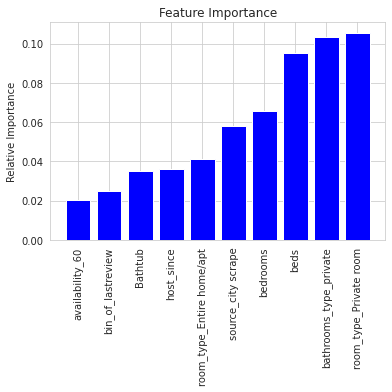

In [ ]:
feat_labels = ton.columns[1:]
indices = np.argsort(importance_xgb)

# customized number
num_features = 10

plt.title('Feature Importance')
plt.bar(range(num_features), importance_xgb[indices[-num_features:]], color='b', align='center')
# plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xticks(range(num_features), [feat_labels[i] for i in indices[-num_features:]], rotation=90)
# plt.tight_layout()
plt.ylabel('Relative Importance')
plt.show()



##Gradient

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gdb=GradientBoostingRegressor(n_estimators=100,random_state=50)
cvs_gdb=cross_val_score(gdb,X_train,y_train,cv=5,scoring='r2')
cvs_gdb

array([0.59040723, 0.58208552, 0.60075127, 0.58951122, 0.54247424])

In [ ]:
cvs_gdb.mean()

0.5810458951707778

In [ ]:
gdb.fit(X_train,y_train)
gdb_model_prediction = gdb.predict(X_test)

In [ ]:
gdb_mse_best = metrics.mean_squared_error(y_test, gdb_model_prediction)
gdb_mae_best = metrics.mean_absolute_error(y_test, gdb_model_prediction)
gdb_rmse_best = np.sqrt(gdb_mse_best)
gdb_r2_best = metrics.r2_score(y_test, gdb_model_prediction)

print("Mean Squared Error: {}".format(gdb_mse_best))
print("Mean Absolute Error: {}".format(gdb_mae_best))
print("Root Mean Absolute Error: {}".format(gdb_rmse_best))
print("R2 score: {}".format(gdb_r2_best))

Mean Squared Error: 0.10135949915928315
Mean Absolute Error: 0.24933300713433693
Root Mean Absolute Error: 0.318370066368186
R2 score: 0.6411980817055163


##Feature importances Gradient

In [ ]:
importance_gdb = gdb.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importance_gdb)[::-1]

feat_labels = ton.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importance_gdb[sorted_indices[f]]))

 1) bedrooms                       0.199683
 2) beds                           0.120928
 3) review_scores_location         0.064396
 4) availability_365               0.049047
 5) distance_to_Amsterdam_center(kms) 0.046901
 6) Food Consumptie                0.045174
 7) room_type_Private room         0.043291
 8) host_since                     0.033650
 9) area_sq_km                     0.031229
10) bin_of_lastreview              0.030973
11) availability_60                0.029565
12) bathrooms                      0.028892
13) number_of_reviews              0.026062
14) bathrooms_type_private         0.021763
15) bathrooms_type_shared          0.018029
16) availability_30                0.016315
17) source_previous scrape         0.014865
18) room_type_Entire home/apt      0.013950
19) count_amenities                0.013520
20) Bathtub                        0.012741
21) Non Food                       0.011090
22) availability_90                0.009761
23) distance_to_airport(kms) 

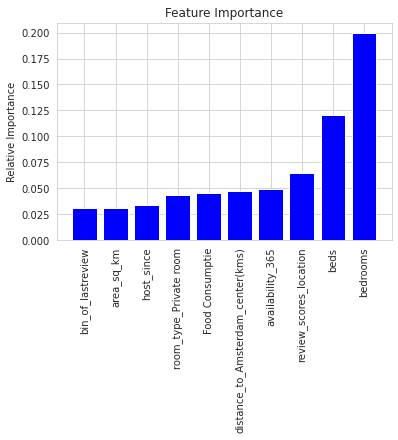

In [ ]:
feat_labels = ton.columns[1:]
indices = np.argsort(importance_gdb)

# customized number
num_features = 10

plt.title('Feature Importance')
plt.bar(range(num_features), importance_gdb[indices[-num_features:]], color='b', align='center')
# plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xticks(range(num_features), [feat_labels[i] for i in indices[-num_features:]], rotation=90)
# plt.tight_layout()
plt.ylabel('Relative Importance')
plt.show()

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=80, random_state=42)
rf_gdb=cross_val_score(rf,X_train,y_train,cv=5,scoring='r2')
rf_gdb

array([0.56476486, 0.55655944, 0.56946365, 0.55089229, 0.51643533])

In [ ]:
rf_gdb.mean()

0.5516231138004049

In [ ]:
rf.fit(X_train,y_train)
rf_model_prediction = rf.predict(X_test)

In [ ]:
rf_mse_best = metrics.mean_squared_error(y_test, rf_model_prediction)
rf_mae_best = metrics.mean_absolute_error(y_test, rf_model_prediction)
rf_rmse_best = np.sqrt(rf_mse_best)
rf_r2_best = metrics.r2_score(y_test, rf_model_prediction)

print("Mean Squared Error: {}".format(rf_mse_best))
print("Mean Absolute Error: {}".format(rf_mae_best))
print("Root Mean Absolute Error: {}".format(rf_rmse_best))
print("R2 score: {}".format(rf_r2_best))

Mean Squared Error: 0.10691489804120782
Mean Absolute Error: 0.25411866075633865
Root Mean Absolute Error: 0.3269784366609025
R2 score: 0.6215325565967822


##EVAL

In [ ]:
model_eval = pd.DataFrame({'Model': ['Linear Regression','Ridge Regression', 'Lasso Regression', 'XGboost' , 'Gradient'],
                           'MSE': [linear_rmse,ridge_mse_best,lasso_mse_best,xgb_mse_best, gdb_mse_best],
                           'MAE': [linear_mae,ridge_mae_best,lasso_mae_best, xgb_mae_best, gdb_mae_best],
                           'RMSE': [linear_rmse, ridge_rmse_best,lasso_rmse_best, xgb_rmse_best, gdb_rmse_best],
                           'R2': [linear_r2,ridge_r2_best,lasso_r2_best,xgb_r2_best,gdb_r2_best]})
model_eval

,Model,MSE,MAE,RMSE,R2
0,Linear Regression,0.321127,0.249055,0.321127,0.634958
1,Ridge Regression,0.103122,0.249063,0.321126,0.634960
2,Lasso Regression,0.102152,0.247980,0.319612,0.638394
3,XGboost,0.101502,0.249314,0.318594,0.640694
4,Gradient,0.101359,0.249333,0.318370,0.641198


In [ ]:
model_eval1 = pd.DataFrame({'Model': ['Linear Regression','Ridge Regression', 'Lasso Regression', 'XGboost' , 'Gradient','Random Forest'],
                           'MSE': [linear_rmse,ridge_mse_best,lasso_mse_best,xgb_mse_best, gdb_mse_best,rf_mse_best],
                           'MAE': [linear_mae,ridge_mae_best,lasso_mae_best, xgb_mae_best, gdb_mae_best,rf_mae_best],
                           'RMSE': [linear_rmse, ridge_rmse_best,lasso_rmse_best, xgb_rmse_best, gdb_rmse_best,rf_rmse_best],
                           'R2': [linear_r2,ridge_r2_best,lasso_r2_best,xgb_r2_best,gdb_r2_best,rf_r2_best]})
model_eval1

,Model,MSE,MAE,RMSE,R2
0,Linear Regression,0.321127,0.249055,0.321127,0.634958
1,Ridge Regression,0.103122,0.249063,0.321126,0.634960
2,Lasso Regression,0.102152,0.247980,0.319612,0.638394
3,XGboost,0.101502,0.249314,0.318594,0.640694
4,Gradient,0.101359,0.249333,0.318370,0.641198
5,Random Forest,0.106915,0.254119,0.326978,0.621533


##Feature Selection

####Visure

In [ ]:
ls.vis=ls.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
ls.vis.drop(columns="review_scores_accuracy" , inplace=True)
ls.vis.drop(columns="review_scores_communication" , inplace=True)
ls.vis.drop(columns="review_scores_value" , inplace=True)


In [ ]:
ls.vis.drop(columns="host_since" , inplace=True)
ls.vis.drop(columns="host_response_rate" , inplace=True)

ls.vis.drop(columns="host_acceptance_rate" , inplace=True)
ls.vis.drop(columns="host_listings_count" , inplace=True)

ls.vis.drop(columns="host_total_listings_count" , inplace=True)
ls.vis.drop(columns="host_has_profile_pic" , inplace=True)
ls.vis.drop(columns="host_identity_verified" , inplace=True)

ls.vis.drop(columns="minimum_nights" , inplace=True)
ls.vis.drop(columns="maximum_nights" , inplace=True)

ls.vis.drop(columns="calculated_host_listings_count_shared_rooms" , inplace=True)

ls.vis.drop(columns="isAmsterdam" , inplace=True)
ls.vis.drop(columns="hot_water" , inplace=True)
ls.vis.drop(columns="bed_lines" , inplace=True)
ls.vis.drop(columns="hair_dryer" , inplace=True)

ls.vis.drop(columns="have_license" , inplace=True)

In [ ]:
ls.vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5103 entries, 0 to 5102
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Metro                                         5103 non-null   float64
 1   Tram                                          5103 non-null   float64
 2   Food Consumptie                               5103 non-null   float64
 3   Food Meenemen                                 5103 non-null   float64
 4   Non Food                                      5103 non-null   float64
 5   neighbourhood                                 5103 non-null   object 
 6   area_sq_km                                    5103 non-null   float64
 7   source                                        5103 non-null   object 
 8   host_response_time                            5103 non-null   object 
 9   host_is_superhost                             5103 non-null   o

In [ ]:
ls.vis = pd.get_dummies(ls.vis, columns=['source'], dummy_na=False)
ls.vis = pd.get_dummies(ls.vis, columns=['neighbourhood'], dummy_na=False)
ls.vis = pd.get_dummies(ls.vis, columns=['property_type'], dummy_na=False)

ls.vis = pd.get_dummies(ls.vis, columns=['room_type'], dummy_na=False)
ls.vis = pd.get_dummies(ls.vis, columns=['bathrooms_type'], dummy_na=False)

In [ ]:
#host_response_time
list_map_host_response_time={'within an hour':1,'within a few hours':2, 'within a day':3, 'a few days or more':4}
ls.vis["host_response_time"] = ls.vis["host_response_time"].map(list_map_host_response_time)

In [ ]:
ls.vis['host_is_superhost'] = ls.vis['host_is_superhost'].map({'f': 0, 't': 1})
ls.vis['has_availability'] = ls.vis['has_availability'].map({'f': 0, 't': 1})
ls.vis['instant_bookable'] = ls.vis['instant_bookable'].map({'f': 0, 't': 1})

In [ ]:
ls.vis['smoke_alarm'] = ls.vis['smoke_alarm'].map({"No": 0, "Smoke alarm": 1})
ls.vis['coffee_maker'] = ls.vis['coffee_maker'].map({"No": 0, "Coffee maker": 1})

In [ ]:
ls.vis['wifi'] = ls.vis['wifi'].map({"No": 0, "Wifi": 1})
ls.vis['Cable_TV'] = ls.vis['Cable_TV'].map({"No": 0, "Cable TV": 1})
ls.vis['Heating'] = ls.vis['Heating'].map({"No": 0, "Heating": 1})
ls.vis['Bathtub'] = ls.vis['Bathtub'].map({"No": 0, "Bathtub": 1})
ls.vis['Air_conditioning'] = ls.vis['Air_conditioning'].map({"No": 0, "Air conditioning": 1})

####Correlation

In [ ]:
ls.corr=ls.copy()

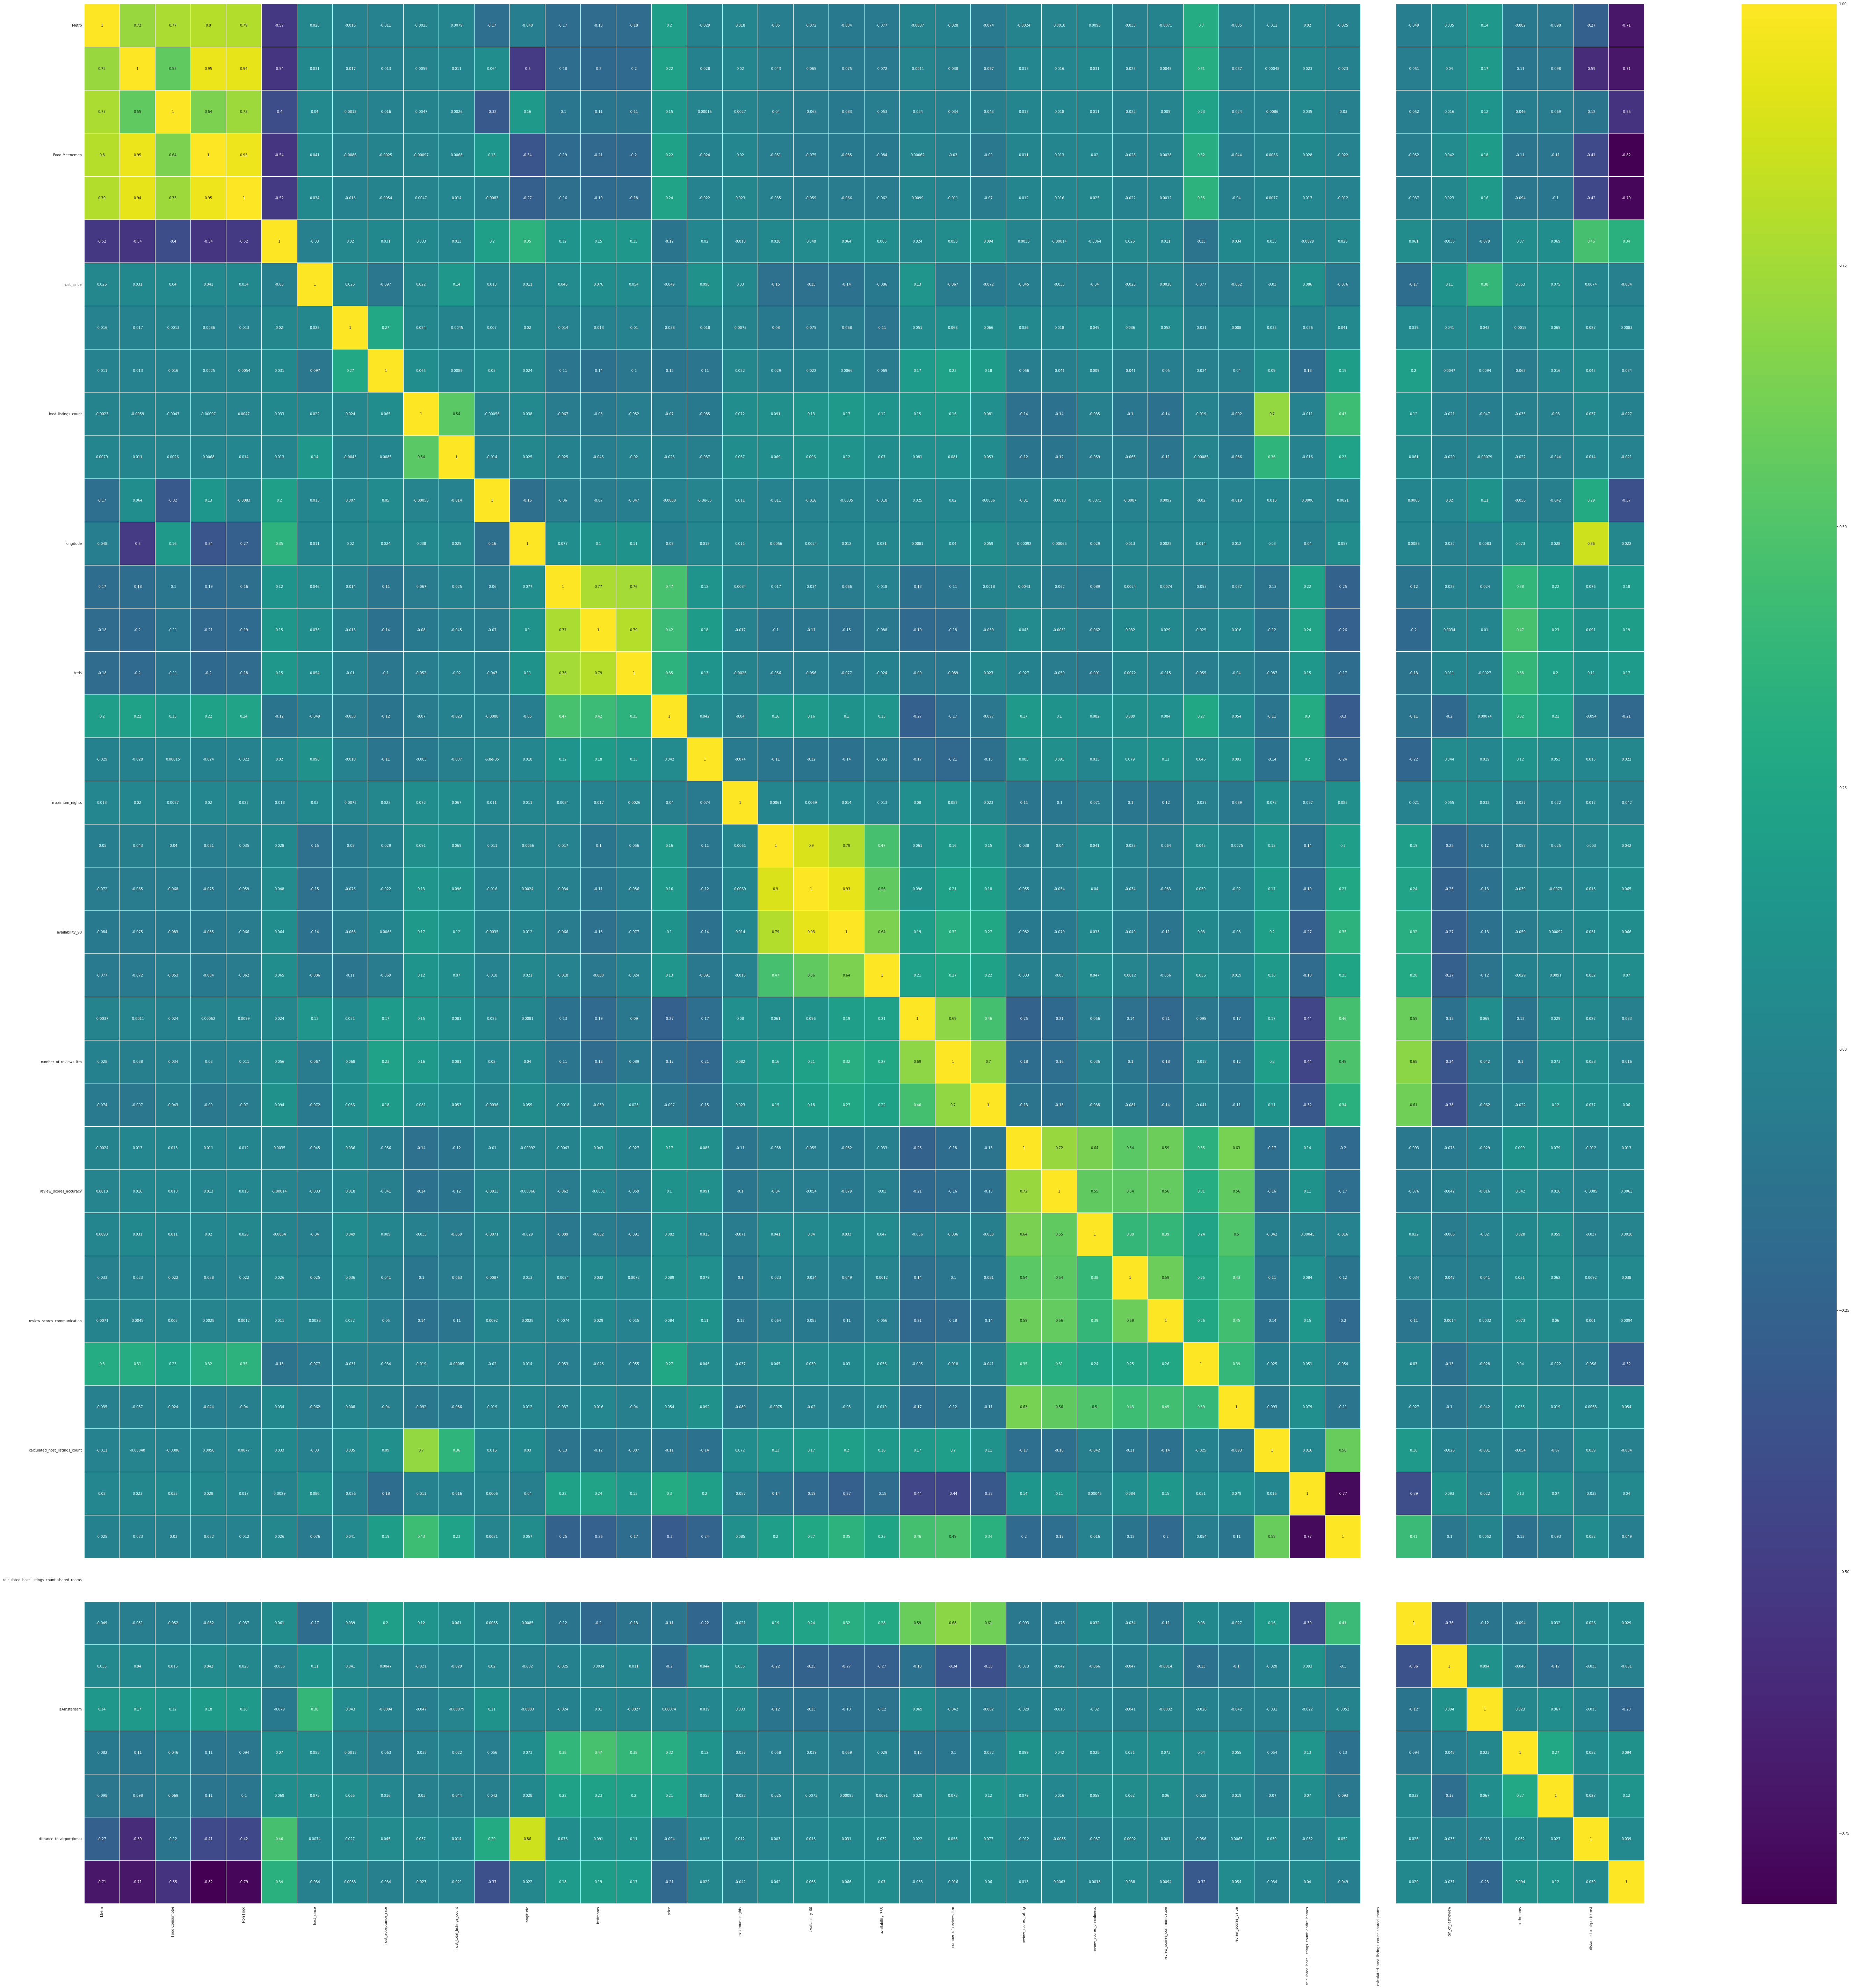

In [ ]:
corr_val = ls.corr.corr()
sns.heatmap(corr_val,annot=True,linewidths=0.3,cmap="viridis")
plt.gcf().set_size_inches(100,100)

In [ ]:
corr_matrix1 = ls.corr.corr().abs()

# Select upper triangle of correlation matrix
upper1 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8 as they are highly correlated
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.50)]
to_drop1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


['Tram',
 'Food Consumptie',
 'Food Meenemen',
 'Non Food',
 'area_sq_km',
 'host_total_listings_count',
 'longitude',
 'bedrooms',
 'beds',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_private_rooms',
 'reviews_per_month',
 'distance_to_airport(kms)',
 'distance_to_Amsterdam_center(kms)']

In [ ]:
ls.corr.drop(to_drop1, axis=1, inplace=True)

In [ ]:
ls.corr = pd.get_dummies(ls.corr, columns=['source'], dummy_na=False)
ls.corr = pd.get_dummies(ls.corr, columns=['neighbourhood'], dummy_na=False)
ls.corr = pd.get_dummies(ls.corr, columns=['property_type'], dummy_na=False)

ls.corr = pd.get_dummies(ls.corr, columns=['room_type'], dummy_na=False)
ls.corr = pd.get_dummies(ls.corr, columns=['bathrooms_type'], dummy_na=False)
ls.corr = pd.get_dummies(ls.corr, columns=['have_license'], dummy_na=False)

In [ ]:
#host_response_time
list_map_host_response_time={'within an hour':1,'within a few hours':2, 'within a day':3, 'a few days or more':4}
ls.corr["host_response_time"] = ls.corr["host_response_time"].map(list_map_host_response_time)

In [ ]:
ls.corr['host_is_superhost'] = ls.corr['host_is_superhost'].map({'f': 0, 't': 1})
ls.corr['host_has_profile_pic'] = ls.corr['host_has_profile_pic'].map({'f': 0, 't': 1})
ls.corr['host_identity_verified'] = ls.corr['host_identity_verified'].map({'f': 0, 't': 1})
ls.corr['has_availability'] = ls.corr['has_availability'].map({'f': 0, 't': 1})
ls.corr['instant_bookable'] = ls.corr['instant_bookable'].map({'f': 0, 't': 1})

In [ ]:
ls.corr['hot_water'] = ls.corr['hot_water'].map({"No": 0, "Hot water": 1})
ls.corr['hair_dryer'] = ls.corr['hair_dryer'].map({"No": 0, "Hair dryer": 1})
ls.corr['smoke_alarm'] = ls.corr['smoke_alarm'].map({"No": 0, "Smoke alarm": 1})
ls.corr['bed_lines'] = ls.corr['bed_lines'].map({"No": 0, "Bed linens": 1})
ls.corr['coffee_maker'] = ls.corr['coffee_maker'].map({"No": 0, "Coffee maker": 1})

In [ ]:
ls.corr['wifi'] = ls.corr['wifi'].map({"No": 0, "Wifi": 1})
ls.corr['Cable_TV'] = ls.corr['Cable_TV'].map({"No": 0, "Cable TV": 1})
ls.corr['Heating'] = ls.corr['Heating'].map({"No": 0, "Heating": 1})
ls.corr['Bathtub'] = ls.corr['Bathtub'].map({"No": 0, "Bathtub": 1})
ls.corr['Air_conditioning'] = ls.corr['Air_conditioning'].map({"No": 0, "Air conditioning": 1})

In [ ]:
ls.corr.shape

(5103, 118)

####Recursive Feature Elimination

In [ ]:
ls.rfe=ls.tf.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x_rfe = ls.rfe.drop('price',axis=1)
y_rfe = ls.rfe['price']

In [ ]:
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(x_rfe, y_rfe, test_size=0.2, random_state=42)

In [ ]:
rfe_gradient = RFE(estimator=GradientBoostingRegressor(n_estimators=100),n_features_to_select=45,verbose=1)
rfe_ridge = RFE(estimator=Ridge(alpha=0.001),n_features_to_select=45,verbose=1)
rfe_lasso = RFE(estimator=Lasso(alpha=0.001),n_features_to_select=45,verbose=1)
rfe_linear = RFE(estimator=LinearRegression(),n_features_to_select=45,verbose=1)

In [ ]:
rfe_gradient.fit(X_train_rfe, y_train_rfe)
rfe_ridge.fit(X_train_rfe, y_train_rfe)
rfe_lasso.fit(X_train_rfe, y_train_rfe)
rfe_linear.fit(X_train_rfe, y_train_rfe)

Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
Fitting estimator with 115 features.
F

RFE(estimator=LinearRegression(), n_features_to_select=45, verbose=1)

In [ ]:
print("linear Model")
rfe_predictions = rfe_linear.predict(X_test_rfe)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test_rfe, rfe_predictions))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test_rfe, rfe_predictions))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test_rfe, rfe_predictions)))
print("R2 score: ",metrics.r2_score(y_test_rfe, rfe_predictions))
print("----------------------------------------------------------------------------------")
print("Ridge Model")
rfe_predictions = rfe_ridge.predict(X_test_rfe)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test_rfe, rfe_predictions))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test_rfe, rfe_predictions))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test_rfe, rfe_predictions)))
print("R2 score: ",metrics.r2_score(y_test_rfe, rfe_predictions))
print("----------------------------------------------------------------------------------")
print("lasso Model")
rfe_predictions = rfe_lasso.predict(X_test_rfe)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test_rfe, rfe_predictions))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test_rfe, rfe_predictions))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test_rfe, rfe_predictions)))
print("R2 score: ",metrics.r2_score(y_test_rfe, rfe_predictions))
print("----------------------------------------------------------------------------------")
print("Gradient Model")
rfe_predictions = rfe_gradient.predict(X_test_rfe)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test_rfe, rfe_predictions))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test_rfe, rfe_predictions))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test_rfe, rfe_predictions)))
print("R2 score: ",metrics.r2_score(y_test_rfe, rfe_predictions))




linear Model
Mean Squared Error:  0.1366225418998388
Mean Absolute Error:  0.28806478542771197
Root Mean Absolute Error:  0.536716671464295
R2 score:  0.5163706359786109
----------------------------------------------------------------------------------
Ridge Model
Mean Squared Error:  0.13944912192153602
Mean Absolute Error:  0.28935443580985487
Root Mean Absolute Error:  0.5379167554648719
R2 score:  0.5063648413327231
----------------------------------------------------------------------------------
lasso Model
Mean Squared Error:  0.10730357254915138
Mean Absolute Error:  0.25654370823714867
Root Mean Absolute Error:  0.5065014395212996
R2 score:  0.6201566899025006
----------------------------------------------------------------------------------
Gradient Model
Mean Squared Error:  0.10324350460979306
Mean Absolute Error:  0.2504354195825992
Root Mean Absolute Error:  0.5004352301573094
R2 score:  0.634528901457714


In [ ]:
from operator import itemgetter
features = ls.rfe.columns.to_list()
for x_rfe, y_rfe in (sorted(zip(rfe_gradient.ranking_ , features), key=itemgetter(0))):
    print(x_rfe, y_rfe)

1 Metro
1 Tram
1 Food Consumptie
1 Food Meenemen
1 Non Food
1 area_sq_km
1 host_acceptance_rate
1 latitude
1 longitude
1 accommodates
1 bedrooms
1 price
1 minimum_nights
1 has_availability
1 availability_30
1 availability_60
1 availability_90
1 availability_365
1 number_of_reviews
1 number_of_reviews_l30d
1 review_scores_rating
1 review_scores_accuracy
1 review_scores_cleanliness
1 review_scores_communication
1 review_scores_location
1 calculated_host_listings_count_shared_rooms
1 reviews_per_month
1 isAmsterdam
1 wifi
1 Heating
1 Air_conditioning
1 count_amenities
1 distance_to_airport(kms)
1 distance_to_Amsterdam_center(kms)
1 neighbourhood_Centrum-Oost
1 property_type_Entire chalet
1 property_type_Entire place
1 property_type_Entire vacation home
1 property_type_Farm stay
1 property_type_Room in hostel
1 property_type_Yurt
1 room_type_Hotel room
1 room_type_Private room
1 bathrooms_type_private
1 have_license_No
2 property_type_Private room in guest suite
3 number_of_reviews_ltm
4 h

In [ ]:
ls.rfe.shape

(5103, 142)

In [ ]:
# ls.rfe.drop(columns="Metro" , inplace=True)
# ls.rfe.drop(columns="Tram" , inplace=True)
# ls.rfe.drop(columns="Food Consumptie" , inplace=True)
# ls.rfe.drop(columns="Food Meenemen" , inplace=True)
# ls.rfe.drop(columns="Non Food" , inplace=True)
# ls.rfe.drop(columns="area_sq_km" , inplace=True)
# ls.rfe.drop(columns="host_acceptance_rate" , inplace=True)
# ls.rfe.drop(columns="host_listings_count" , inplace=True)
# ls.rfe.drop(columns="host_identity_verified" , inplace=True)
# ls.rfe.drop(columns="latitude" , inplace=True)

# ls.rfe.drop(columns="longitude" , inplace=True)
# ls.rfe.drop(columns="accommodates" , inplace=True)
# ls.rfe.drop(columns="bedrooms" , inplace=True)
# ls.rfe.drop(columns="price" , inplace=True)
# ls.rfe.drop(columns="minimum_nights" , inplace=True)
# ls.rfe.drop(columns="has_availability" , inplace=True)
# ls.rfe.drop(columns="availability_30" , inplace=True)
# ls.rfe.drop(columns="availability_60" , inplace=True)
# ls.rfe.drop(columns="availability_90" , inplace=True)
# ls.rfe.drop(columns="availability_365" , inplace=True)

# ls.rfe.drop(columns="number_of_reviews" , inplace=True)
# ls.rfe.drop(columns="number_of_reviews_l30d" , inplace=True)
# ls.rfe.drop(columns="review_scores_rating" , inplace=True)
# ls.rfe.drop(columns="review_scores_accuracy" , inplace=True)
# ls.rfe.drop(columns="review_scores_cleanliness" , inplace=True)
# ls.rfe.drop(columns="review_scores_communication" , inplace=True)
# ls.rfe.drop(columns="review_scores_location" , inplace=True)
# ls.rfe.drop(columns="calculated_host_listings_count_shared_rooms" , inplace=True)
# ls.rfe.drop(columns="reviews_per_month" , inplace=True)
# ls.rfe.drop(columns="isAmsterdam" , inplace=True)

# ls.rfe.drop(columns="wifi" , inplace=True)
# ls.rfe.drop(columns="Heating" , inplace=True)
# ls.rfe.drop(columns="Air_conditioning" , inplace=True)
# ls.rfe.drop(columns="count_amenities" , inplace=True)
# ls.rfe.drop(columns="distance_to_airport(kms)" , inplace=True)
# ls.rfe.drop(columns="distance_to_Amsterdam_center(kms)" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire chalet" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire vacation home" , inplace=True)
# ls.rfe.drop(columns="property_type_Farm stay" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in guesthouse" , inplace=True)

# ls.rfe.drop(columns="property_type_Room in hostel" , inplace=True)
# ls.rfe.drop(columns="property_type_Yurt" , inplace=True)
# ls.rfe.drop(columns="room_type_Hotel room" , inplace=True)
# ls.rfe.drop(columns="room_type_Private room" , inplace=True)
# ls.rfe.drop(columns="bathrooms_type_private" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Centrum-Oost" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in rental unit" , inplace=True)
# ls.rfe.drop(columns="host_since" , inplace=True)
# ls.rfe.drop(columns="have_license_No" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in guest suite" , inplace=True)

# ls.rfe.drop(columns="hair_dryer" , inplace=True)
# ls.rfe.drop(columns="property_type_Room in bed and breakfast" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire home/apt" , inplace=True)
# ls.rfe.drop(columns="bathrooms_type_shared" , inplace=True)
# ls.rfe.drop(columns="review_scores_checkin" , inplace=True)
# ls.rfe.drop(columns="beds" , inplace=True)
# ls.rfe.drop(columns="instant_bookable" , inplace=True)
# ls.rfe.drop(columns="Bathtub" , inplace=True)
# ls.rfe.drop(columns="property_type_Camper/RV" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Noord-West" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Buitenveldert - Zuidas" , inplace=True)
# ls.rfe.drop(columns="review_scores_value" , inplace=True)
# ls.rfe.drop(columns="Cable_TV" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire serviced apartment" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire place" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Oud-Oost" , inplace=True)
# ls.rfe.drop(columns="host_total_listings_count" , inplace=True)
# ls.rfe.drop(columns="property_type_Barn" , inplace=True)
# ls.rfe.drop(columns="host_response_time" , inplace=True)
# ls.rfe.drop(columns="bin_of_lastreview" , inplace=True)
# ls.rfe.drop(columns="property_type_Boat" , inplace=True)
# ls.rfe.drop(columns="property_type_Cave" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in home" , inplace=True)
# ls.rfe.drop(columns="property_type_Tiny home" , inplace=True)
# ls.rfe.drop(columns="property_type_Tower" , inplace=True)
# ls.rfe.drop(columns="host_response_rate" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire bungalow" , inplace=True)
# ls.rfe.drop(columns="host_has_profile_pic" , inplace=True)
# ls.rfe.drop(columns="property_type_Windmill" , inplace=True)
# ls.rfe.drop(columns="room_type_Entire home/apt" , inplace=True)
# ls.rfe.drop(columns="have_license_Exempt" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Westerpark" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in condo" , inplace=True)
# ls.rfe.drop(columns="property_type_Room in hotel" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in tiny home" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in villa" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in serviced apartment" , inplace=True)
# ls.rfe.drop(columns="host_is_superhost" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire condo" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire cottage" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in townhouse" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in casa particular" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Noord-Oost" , inplace=True)
# ls.rfe.drop(columns="bed_lines" , inplace=True)
# ls.rfe.drop(columns="bathrooms" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire rental unit" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Oostelijk Havengebied - Indische Buurt" , inplace=True)
# ls.rfe.drop(columns="property_type_Room in boutique hotel" , inplace=True)
# ls.rfe.drop(columns="hot_water" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Slotervaart" , inplace=True)
# ls.rfe.drop(columns="smoke_alarm" , inplace=True)
# ls.rfe.drop(columns="property_type_Room in casa particular" , inplace=True)
# ls.rfe.drop(columns="calculated_host_listings_count_entire_homes" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire villa" , inplace=True)
# ls.rfe.drop(columns="calculated_host_listings_count_private_rooms" , inplace=True)
# ls.rfe.drop(columns="maximum_nights" , inplace=True)
# ls.rfe.drop(columns="coffee_maker" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in cabin" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in bungalow" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in nature lodge" , inplace=True)
# ls.rfe.drop(columns="property_type_Houseboat" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in bed and breakfast" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in loft" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in houseboat" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in island" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire cabin" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Osdorp" , inplace=True)
# ls.rfe.drop(columns="source_city scrape" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Oud-Noord" , inplace=True)
# ls.rfe.drop(columns="source_previous scrape" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire townhouse" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Bijlmer-Centrum" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room in boat" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Bijlmer-Oost" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Watergraafsmeer" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Bos en Lommer" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Zuid" , inplace=True)
# ls.rfe.drop(columns="property_type_Private room" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire loft" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire guest suite" , inplace=True)
# ls.rfe.drop(columns="number_of_reviews_ltm" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire guesthouse" , inplace=True)
# ls.rfe.drop(columns="calculated_host_listings_count" , inplace=True)
# ls.rfe.drop(columns="property_type_Entire home" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_IJburg - Zeeburgereiland" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Centrum-West" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Geuzenveld - Slotermeer" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_De Aker - Nieuw Sloten" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_Gaasperdam - Driemond" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_De Baarsjes - Oud-West" , inplace=True)
# ls.rfe.drop(columns="neighbourhood_De Pijp - Rivierenbuurt" , inplace=True)

In [ ]:
ls.rfe.drop(columns="neighbourhood_Centrum-Oost" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in rental unit" , inplace=True)
ls.rfe.drop(columns="host_since" , inplace=True)
ls.rfe.drop(columns="have_license_No" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in guest suite" , inplace=True)

ls.rfe.drop(columns="hair_dryer" , inplace=True)
ls.rfe.drop(columns="property_type_Room in bed and breakfast" , inplace=True)
ls.rfe.drop(columns="property_type_Entire home/apt" , inplace=True)
ls.rfe.drop(columns="bathrooms_type_shared" , inplace=True)
ls.rfe.drop(columns="review_scores_checkin" , inplace=True)
ls.rfe.drop(columns="beds" , inplace=True)
ls.rfe.drop(columns="instant_bookable" , inplace=True)
ls.rfe.drop(columns="Bathtub" , inplace=True)
ls.rfe.drop(columns="property_type_Camper/RV" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Noord-West" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Buitenveldert - Zuidas" , inplace=True)
ls.rfe.drop(columns="review_scores_value" , inplace=True)
ls.rfe.drop(columns="Cable_TV" , inplace=True)
ls.rfe.drop(columns="property_type_Entire serviced apartment" , inplace=True)
ls.rfe.drop(columns="property_type_Entire place" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Oud-Oost" , inplace=True)
ls.rfe.drop(columns="host_total_listings_count" , inplace=True)
ls.rfe.drop(columns="property_type_Barn" , inplace=True)
ls.rfe.drop(columns="host_response_time" , inplace=True)
ls.rfe.drop(columns="bin_of_lastreview" , inplace=True)
ls.rfe.drop(columns="property_type_Boat" , inplace=True)
ls.rfe.drop(columns="property_type_Cave" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in home" , inplace=True)
ls.rfe.drop(columns="property_type_Tiny home" , inplace=True)
ls.rfe.drop(columns="property_type_Tower" , inplace=True)
ls.rfe.drop(columns="host_response_rate" , inplace=True)
ls.rfe.drop(columns="property_type_Entire bungalow" , inplace=True)
ls.rfe.drop(columns="host_has_profile_pic" , inplace=True)
ls.rfe.drop(columns="property_type_Windmill" , inplace=True)
ls.rfe.drop(columns="room_type_Entire home/apt" , inplace=True)
ls.rfe.drop(columns="have_license_Exempt" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Westerpark" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in condo" , inplace=True)
ls.rfe.drop(columns="property_type_Room in hotel" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in tiny home" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in villa" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in serviced apartment" , inplace=True)
ls.rfe.drop(columns="host_is_superhost" , inplace=True)
ls.rfe.drop(columns="property_type_Entire condo" , inplace=True)
ls.rfe.drop(columns="property_type_Entire cottage" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in townhouse" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in casa particular" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Noord-Oost" , inplace=True)
ls.rfe.drop(columns="bed_lines" , inplace=True)
ls.rfe.drop(columns="bathrooms" , inplace=True)
ls.rfe.drop(columns="property_type_Entire rental unit" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Oostelijk Havengebied - Indische Buurt" , inplace=True)
ls.rfe.drop(columns="property_type_Room in boutique hotel" , inplace=True)
ls.rfe.drop(columns="hot_water" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Slotervaart" , inplace=True)
ls.rfe.drop(columns="smoke_alarm" , inplace=True)
ls.rfe.drop(columns="property_type_Room in casa particular" , inplace=True)
ls.rfe.drop(columns="calculated_host_listings_count_entire_homes" , inplace=True)
ls.rfe.drop(columns="property_type_Entire villa" , inplace=True)
ls.rfe.drop(columns="calculated_host_listings_count_private_rooms" , inplace=True)
ls.rfe.drop(columns="maximum_nights" , inplace=True)
ls.rfe.drop(columns="coffee_maker" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in cabin" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in bungalow" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in nature lodge" , inplace=True)
ls.rfe.drop(columns="property_type_Houseboat" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in bed and breakfast" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in loft" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in houseboat" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in island" , inplace=True)
ls.rfe.drop(columns="property_type_Entire cabin" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Osdorp" , inplace=True)
ls.rfe.drop(columns="source_city scrape" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Oud-Noord" , inplace=True)
ls.rfe.drop(columns="source_previous scrape" , inplace=True)
ls.rfe.drop(columns="property_type_Entire townhouse" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Bijlmer-Centrum" , inplace=True)
ls.rfe.drop(columns="property_type_Private room in boat" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Bijlmer-Oost" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Watergraafsmeer" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Bos en Lommer" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Zuid" , inplace=True)
ls.rfe.drop(columns="property_type_Private room" , inplace=True)
ls.rfe.drop(columns="property_type_Entire loft" , inplace=True)
ls.rfe.drop(columns="property_type_Entire guest suite" , inplace=True)
ls.rfe.drop(columns="number_of_reviews_ltm" , inplace=True)
ls.rfe.drop(columns="property_type_Entire guesthouse" , inplace=True)
ls.rfe.drop(columns="calculated_host_listings_count" , inplace=True)
ls.rfe.drop(columns="property_type_Entire home" , inplace=True)
ls.rfe.drop(columns="neighbourhood_IJburg - Zeeburgereiland" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Centrum-West" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Geuzenveld - Slotermeer" , inplace=True)
ls.rfe.drop(columns="neighbourhood_De Aker - Nieuw Sloten" , inplace=True)
ls.rfe.drop(columns="neighbourhood_Gaasperdam - Driemond" , inplace=True)
ls.rfe.drop(columns="neighbourhood_De Baarsjes - Oud-West" , inplace=True)
ls.rfe.drop(columns="neighbourhood_De Pijp - Rivierenbuurt" , inplace=True)

In [ ]:
x_rfe = ls.rfe.drop('price',axis=1)
y_rfe = ls.rfe['price']

In [ ]:
X_train_rfe1,X_test_rfe1,y_train_rfe1,y_test_rfe1 = train_test_split(x_rfe,y_rfe, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb

In [ ]:
xgb1=xgb.XGBRegressor(objective="reg:linear",learning_rate=0.1,n_estimators=400)

In [ ]:
xgb1.fit(X_train_rfe1,y_train_rfe1)
xgb_prediction1 = xgb1.predict(X_test_rfe1)

[18:54:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_mse_best = metrics.mean_squared_error(y_test_rfe1, xgb_prediction1)
xgb_mae_best = metrics.mean_absolute_error(y_test_rfe1, xgb_prediction1)
xgb_rmse_best = np.sqrt(xgb_mse_best)
xgb_r2_best = metrics.r2_score(y_test_rfe1, xgb_prediction1)

print("Mean Squared Error: {}".format(xgb_mse_best))
print("Mean Absolute Error: {}".format(xgb_mae_best))
print("Root Mean Absolute Error: {}".format(xgb_rmse_best))
print("R2 score: {}".format(xgb_r2_best))

Mean Squared Error: 0.10940994901363232
Mean Absolute Error: 0.25658243671132575
Root Mean Absolute Error: 0.3307717476049494
R2 score: 0.6127003397589542


####P-value

In [ ]:
import statsmodels.api as sm
X_lin = sm.add_constant(X_train)
est =sm.OLS(y_train,X_train).fit()
est.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     48.97
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:54:05   Log-Likelihood:                -1242.8
No. Observations:                4082   AIC:                             2746.
Df Residuals:                    3952   BIC:                             3567.
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Metro                                                    0.0055      0.003      1.936      0.053   -7.03e-05       0.011
Tram                                                     0.0021      0.001      1.720      0.086      -0.000       0.004
Food Consumptie                                          0.0010      0.002      0.440      0.660      -0.003       0.005
Food Meenemen                                           -0.0060      0.003     -2.238      0.025      -0.011      -0.001
Non Food                                                -0.0009      0.002     -0.528      0.598      -0.004       0.003
area_sq_km                                               0.0426      0.099      0.428      0.669      -0.152       0.238
host_since                                              -0.0035      0.003     -1.369      0.171      -0.009       0.002
host_response_time                                      -0.0005      0.009     -0.057      0.954      -0.018       0.017
host_response_rate                                     2.76e-05      0.001      0.055      0.956      -0.001       0.001
host_acceptance_rate                                     0.0004      0.000      1.586      0.113   -8.81e-05       0.001
host_is_superhost                                        0.0062      0.018      0.338      0.735      -0.030       0.042
host_listings_count                                      0.0060      0.015      0.411      0.681      -0.023       0.035
host_total_listings_count                                0.0019      0.005      0.352      0.725      -0.009       0.013
host_has_profile_pic                                     0.0294      0.063      0.469      0.639      -0.094       0.152
host_identity_verified                                   0.0337      0.014      2.385      0.017       0.006       0.061
latitude                                                -0.6218      1.723     -0.361      0.718      -3.999       2.756
longitude                                               -1.4061      1.428     -0.985      0.325      -4.205       1.393
accommodates                                             0.1398      0.008     17.095      0.000       0.124       0.156
bedrooms                                                 0.1025      0.013      8.143      0.000       0.078       0.127
beds                                                    -0.0225      0.009     -2.549      0.011      -0.040      -0.005
minimum_nights                                          -0.0228      0.004     -6.036      0.000      -0.030      -0.015
maximum_nights                                       -5.699e-06   1.08e-05     -0.529      0.597   -2.68e-05    1.54e-05
has_availability                                         0

In [ ]:
ls_dropfeature = ls.tf.copy()

In [ ]:
ls_dropfeature.drop(columns="host_response_time" , inplace=True)
ls_dropfeature.drop(columns="host_is_superhost" , inplace=True)
ls_dropfeature.drop(columns="host_listings_count" , inplace=True)
ls_dropfeature.drop(columns="host_total_listings_count" , inplace=True)

ls_dropfeature.drop(columns="host_has_profile_pic" , inplace=True)
ls_dropfeature.drop(columns="maximum_nights" , inplace=True)
ls_dropfeature.drop(columns="has_availability" , inplace=True)
ls_dropfeature.drop(columns="review_scores_checkin" , inplace=True)
ls_dropfeature.drop(columns="coffee_maker" , inplace=True)
ls_dropfeature.drop(columns="Heating" , inplace=True)
ls_dropfeature.drop(columns="property_type_Entire bungalow" , inplace=True)
ls_dropfeature.drop(columns="property_type_Entire villa" , inplace=True)
ls_dropfeature.drop(columns="property_type_Farm stay" , inplace=True)
ls_dropfeature.drop(columns="property_type_Houseboat" , inplace=True)

ls_dropfeature.drop(columns="area_sq_km" , inplace=True)
ls_dropfeature.drop(columns="host_since" , inplace=True)
ls_dropfeature.drop(columns="host_response_rate" , inplace=True)

ls_dropfeature.drop(columns="instant_bookable" , inplace=True)

ls_dropfeature.drop(columns="availability_90" , inplace=True)
ls_dropfeature.drop(columns="review_scores_accuracy" , inplace=True)
ls_dropfeature.drop(columns="review_scores_communication" , inplace=True)

ls_dropfeature.drop(columns="calculated_host_listings_count" , inplace=True)
ls_dropfeature.drop(columns="calculated_host_listings_count_entire_homes" , inplace=True)
ls_dropfeature.drop(columns="calculated_host_listings_count_private_rooms" , inplace=True)
ls_dropfeature.drop(columns="calculated_host_listings_count_shared_rooms" , inplace=True)


ls_dropfeature.drop(columns="isAmsterdam" , inplace=True)
ls_dropfeature.drop(columns="hair_dryer" , inplace=True)
ls_dropfeature.drop(columns="smoke_alarm" , inplace=True)
ls_dropfeature.drop(columns="bed_lines" , inplace=True)
ls_dropfeature.drop(columns="wifi" , inplace=True)
#ls_dropfeature.drop(columns="source_city scrape" , inplace=True)
#ls_dropfeature.drop(columns="source_previous scrape" , inplace=True)
ls_dropfeature.drop(columns="have_license_Exempt" , inplace=True)
ls_dropfeature.drop(columns="have_license_No" , inplace=True)
ls_dropfeature.drop(columns="have_license_Yes" , inplace=True)

ls_dropfeature.drop(columns="latitude" , inplace=True)
ls_dropfeature.drop(columns="beds" , inplace=True)

In [ ]:
ls_dropfeature.shape

(5103, 107)

## Eval after feature selection

In [ ]:
import xgboost as xgb
xgb=xgb.XGBRegressor(objective="reg:linear",learning_rate=0.1,n_estimators=400)

In [ ]:
data = [ls.tf,ls.vis,ls.corr,ls_dropfeature]
for i in data:
  x = i.drop('price',axis=1)
  y = i['price']
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  print("__linear Model__")
  linear.fit(X_train,y_train)
  linear_model_prediction = linear.predict(X_test)
  print("Mean Squared Error: ",metrics.mean_squared_error(y_test, linear_model_prediction))
  print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, linear_model_prediction))
  print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, linear_model_prediction)))
  print("R2 score: ",metrics.r2_score(y_test, linear_model_prediction))
  print("__Ridge Model__")
  ridge.fit(X_train,y_train)
  ridge_model_prediction = ridge.predict(X_test)
  print("Mean Squared Error: ",metrics.mean_squared_error(y_test, ridge_model_prediction))
  print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, ridge_model_prediction))
  print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, ridge_model_prediction)))
  print("R2 score: ",metrics.r2_score(y_test, ridge_model_prediction))
  print("__Lasso Model__")
  lasso.fit(X_train,y_train)
  lasso_model_prediction = lasso.predict(X_test)
  print("Mean Squared Error: ",metrics.mean_squared_error(y_test, lasso_model_prediction))
  print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, lasso_model_prediction))
  print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, lasso_model_prediction)))
  print("R2 score: ",metrics.r2_score(y_test, lasso_model_prediction))
  print("__Gradiant__")
  gdb.fit(X_train,y_train)
  gdb_model_prediction = gdb.predict(X_test)
  print("Mean Squared Error: ",metrics.mean_squared_error(y_test, gdb_model_prediction))
  print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, gdb_model_prediction))
  print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, gdb_model_prediction)))
  print("R2 score: ",metrics.r2_score(y_test, gdb_model_prediction))



  print("------------------------------------------------------------------------------------------------")

__linear Model__
Mean Squared Error:  0.10312223417962783
Mean Absolute Error:  0.2490549286460494
Root Mean Absolute Error:  0.4990540337939865
R2 score:  0.6349581859681603
__Ridge Model__
Mean Squared Error:  0.1031216888954139
Mean Absolute Error:  0.24906325046182295
Root Mean Absolute Error:  0.49906237131427067
R2 score:  0.6349601162166679
__Lasso Model__
Mean Squared Error:  0.10215174358360353
Mean Absolute Error:  0.2479797853674672
Root Mean Absolute Error:  0.49797568752647675
R2 score:  0.6383936201448139
__Gradiant__
Mean Squared Error:  0.10135949915928315
Mean Absolute Error:  0.24933300713433693
Root Mean Absolute Error:  0.49933256166039974
R2 score:  0.6411980817055163
------------------------------------------------------------------------------------------------
__linear Model__
Mean Squared Error:  0.10512169583099655
Mean Absolute Error:  0.25248436952630837
Root Mean Absolute Error:  0.502478227912721
R2 score:  0.6278803029673776
__Ridge Model__
Mean Squared E

In [ ]:
print("linear Model")
rfe_predictions = rfe_linear.predict(X_test_rfe)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, rfe_predictions))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, rfe_predictions))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, rfe_predictions)))
print("R2 score: ",metrics.r2_score(y_test, rfe_predictions))
print("----------------------------------------------------------------------------------")
print("Ridge Model")
rfe_predictions = rfe_ridge.predict(X_test_rfe)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, rfe_predictions))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, rfe_predictions))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, rfe_predictions)))
print("R2 score: ",metrics.r2_score(y_test, rfe_predictions))
print("----------------------------------------------------------------------------------")
print("lasso Model")
rfe_predictions = rfe_lasso.predict(X_test_rfe)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, rfe_predictions))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, rfe_predictions))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, rfe_predictions)))
print("R2 score: ",metrics.r2_score(y_test, rfe_predictions))
print("----------------------------------------------------------------------------------")
print("Gradient Model")
rfe_predictions = rfe_gradient.predict(X_test_rfe)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, rfe_predictions))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, rfe_predictions))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, rfe_predictions)))
print("R2 score: ",metrics.r2_score(y_test, rfe_predictions))
print("----------------------------------------------------------------------------------")


linear Model
Mean Squared Error:  0.1366225418998388
Mean Absolute Error:  0.28806478542771197
Root Mean Absolute Error:  0.536716671464295
R2 score:  0.5163706359786109
----------------------------------------------------------------------------------
Ridge Model
Mean Squared Error:  0.13944912192153602
Mean Absolute Error:  0.28935443580985487
Root Mean Absolute Error:  0.5379167554648719
R2 score:  0.5063648413327231
----------------------------------------------------------------------------------
lasso Model
Mean Squared Error:  0.10730357254915138
Mean Absolute Error:  0.25654370823714867
Root Mean Absolute Error:  0.5065014395212996
R2 score:  0.6201566899025006
----------------------------------------------------------------------------------
Gradient Model
Mean Squared Error:  0.10324350460979306
Mean Absolute Error:  0.2504354195825992
Root Mean Absolute Error:  0.5004352301573094
R2 score:  0.634528901457714
-------------------------------------------------------------------

In [ ]:
ls.corr.shape

(5103, 118)

With XGboost Model

In [ ]:
import xgboost as xgb
xgb2=xgb.XGBRegressor(objective="reg:linear",learning_rate=0.1,n_estimators=400)

XGboost with corration feature

In [ ]:
x2 = ls.corr.drop('price',axis=1)
y2 = ls.corr['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)
xgb2.fit(X_train2,y_train2)
xgb_prediction2 = xgb2.predict(X_test2)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, xgb_prediction2))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, xgb_prediction2))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, xgb_prediction2)))
print("R2 score: ",metrics.r2_score(y_test, xgb_prediction2))


[18:54:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error:  0.1109653135883331
Mean Absolute Error:  0.2625887170823572
Root Mean Absolute Error:  0.5124341099910867
R2 score:  0.6071945134902891


XGboost with Pvalue feature

In [ ]:
x2 = ls_dropfeature.drop('price',axis=1)
y2 = ls_dropfeature['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)
xgb2.fit(X_train2,y_train2)
xgb_prediction2 = xgb2.predict(X_test2)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, xgb_prediction2))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, xgb_prediction2))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, xgb_prediction2)))
print("R2 score: ",metrics.r2_score(y_test, xgb_prediction2))

[18:54:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error:  0.10097019222005335
Mean Absolute Error:  0.24674880645571243
Root Mean Absolute Error:  0.49673816690054373
R2 score:  0.6425761871397342


XGboost with Visure

In [ ]:
x2 = ls.vis.drop('price',axis=1)
y2 = ls.vis['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)
xgb2.fit(X_train2,y_train2)
xgb_prediction2 = xgb2.predict(X_test2)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, xgb_prediction2))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, xgb_prediction2))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, xgb_prediction2)))
print("R2 score: ",metrics.r2_score(y_test, xgb_prediction2))

[18:54:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error:  0.10304142658913495
Mean Absolute Error:  0.2508050745473474
Root Mean Absolute Error:  0.500804427443835
R2 score:  0.6352442363011048


XBBoost with Recursive Feature Elimination

In [ ]:
xgb_mse_best = metrics.mean_squared_error(y_test_rfe1, xgb_prediction1)
xgb_mae_best = metrics.mean_absolute_error(y_test_rfe1, xgb_prediction1)
xgb_rmse_best = np.sqrt(xgb_mse_best)
xgb_r2_best = metrics.r2_score(y_test_rfe1, xgb_prediction1)

print("Mean Squared Error: {}".format(xgb_mse_best))
print("Mean Absolute Error: {}".format(xgb_mae_best))
print("Root Mean Absolute Error: {}".format(xgb_rmse_best))
print("R2 score: {}".format(xgb_r2_best))

Mean Squared Error: 0.10940994901363232
Mean Absolute Error: 0.25658243671132575
Root Mean Absolute Error: 0.3307717476049494
R2 score: 0.6127003397589542


##Test drop feature โดยใช้ Corrartion และ RFE พร้อมกัน

In [ ]:
df = ls.rfe.copy()

In [ ]:
df.shape

(5103, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5103 entries, 0 to 5102
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Metro                                        5103 non-null   float64
 1   Tram                                         5103 non-null   float64
 2   Food Consumptie                              5103 non-null   float64
 3   Food Meenemen                                5103 non-null   float64
 4   Non Food                                     5103 non-null   float64
 5   area_sq_km                                   5103 non-null   float64
 6   host_acceptance_rate                         5103 non-null   int64  
 7   host_listings_count                          5103 non-null   int64  
 8   host_identity_verified                       5103 non-null   int64  
 9   latitude                                     5103 non-null   float64
 10  

In [ ]:
df.drop(columns='Tram', inplace=True)
df.drop(columns='Food Consumptie',inplace=True)
df.drop(columns='Food Meenemen',inplace=True)
df.drop(columns='Non Food',inplace=True)
df.drop(columns='area_sq_km',inplace=True)

df.drop(columns='longitude',inplace=True)
df.drop(columns='bedrooms',inplace=True)

df.drop(columns='availability_60',inplace=True)
df.drop(columns='availability_90',inplace=True)
df.drop(columns='availability_365',inplace=True)

df.drop(columns='number_of_reviews_l30d',inplace=True)
df.drop(columns='review_scores_accuracy',inplace=True)
df.drop(columns='review_scores_cleanliness',inplace=True)

df.drop(columns='review_scores_communication',inplace=True)

df.drop(columns='reviews_per_month',inplace=True)
df.drop(columns='distance_to_airport(kms)',inplace=True)
df.drop(columns='distance_to_Amsterdam_center(kms)',inplace=True)

In [ ]:
df.shape

(5103, 29)

In [ ]:
x2 = df.drop('price',axis=1)
y2 = df['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)
xgb2.fit(X_train2,y_train2)
xgb_prediction2 = xgb2.predict(X_test2)
print("Mean Squared Error: ",metrics.mean_squared_error(y_test, xgb_prediction2))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, xgb_prediction2))
print("Root Mean Absolute Error: ",np.sqrt(metrics.mean_absolute_error(y_test, xgb_prediction2)))
print("R2 score: ",metrics.r2_score(y_test, xgb_prediction2))

[18:54:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error:  0.1270046978519902
Mean Absolute Error:  0.2793881047966388
Root Mean Absolute Error:  0.5285717593635123
R2 score:  0.5504167877734444
